In [55]:
import pandas as pd
import glob

csv_files = glob.glob("../results/independent/*.csv")

df_list = []

for file in csv_files:
    region_name = file.split("\\")[-1].split(".csv")[0]
    
    df = pd.read_csv(file)
    df["Region"] = region_name
    df_list.append(df)

all_df = pd.concat(df_list, ignore_index=True)

In [ ]:
import matplotlib.pyplot as plt

regions = all_df["Region"].unique()
num_regions = len(regions)

cols = 4
rows = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 12), sharex=True, sharey=True)

for idx, region in enumerate(regions):
    r = idx // cols
    c = idx % cols
    ax = axes[r, c]
    
    region_df = all_df[all_df["Region"] == region]
    ax.plot(region_df["epoch"], region_df["recall"], marker='x')
    ax.set_title(region)
    ax.grid(True)

fig.suptitle("Recall over Epochs by Region", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("../plots/independent/recall.png", dpi=300, bbox_inches="tight")
plt.show()

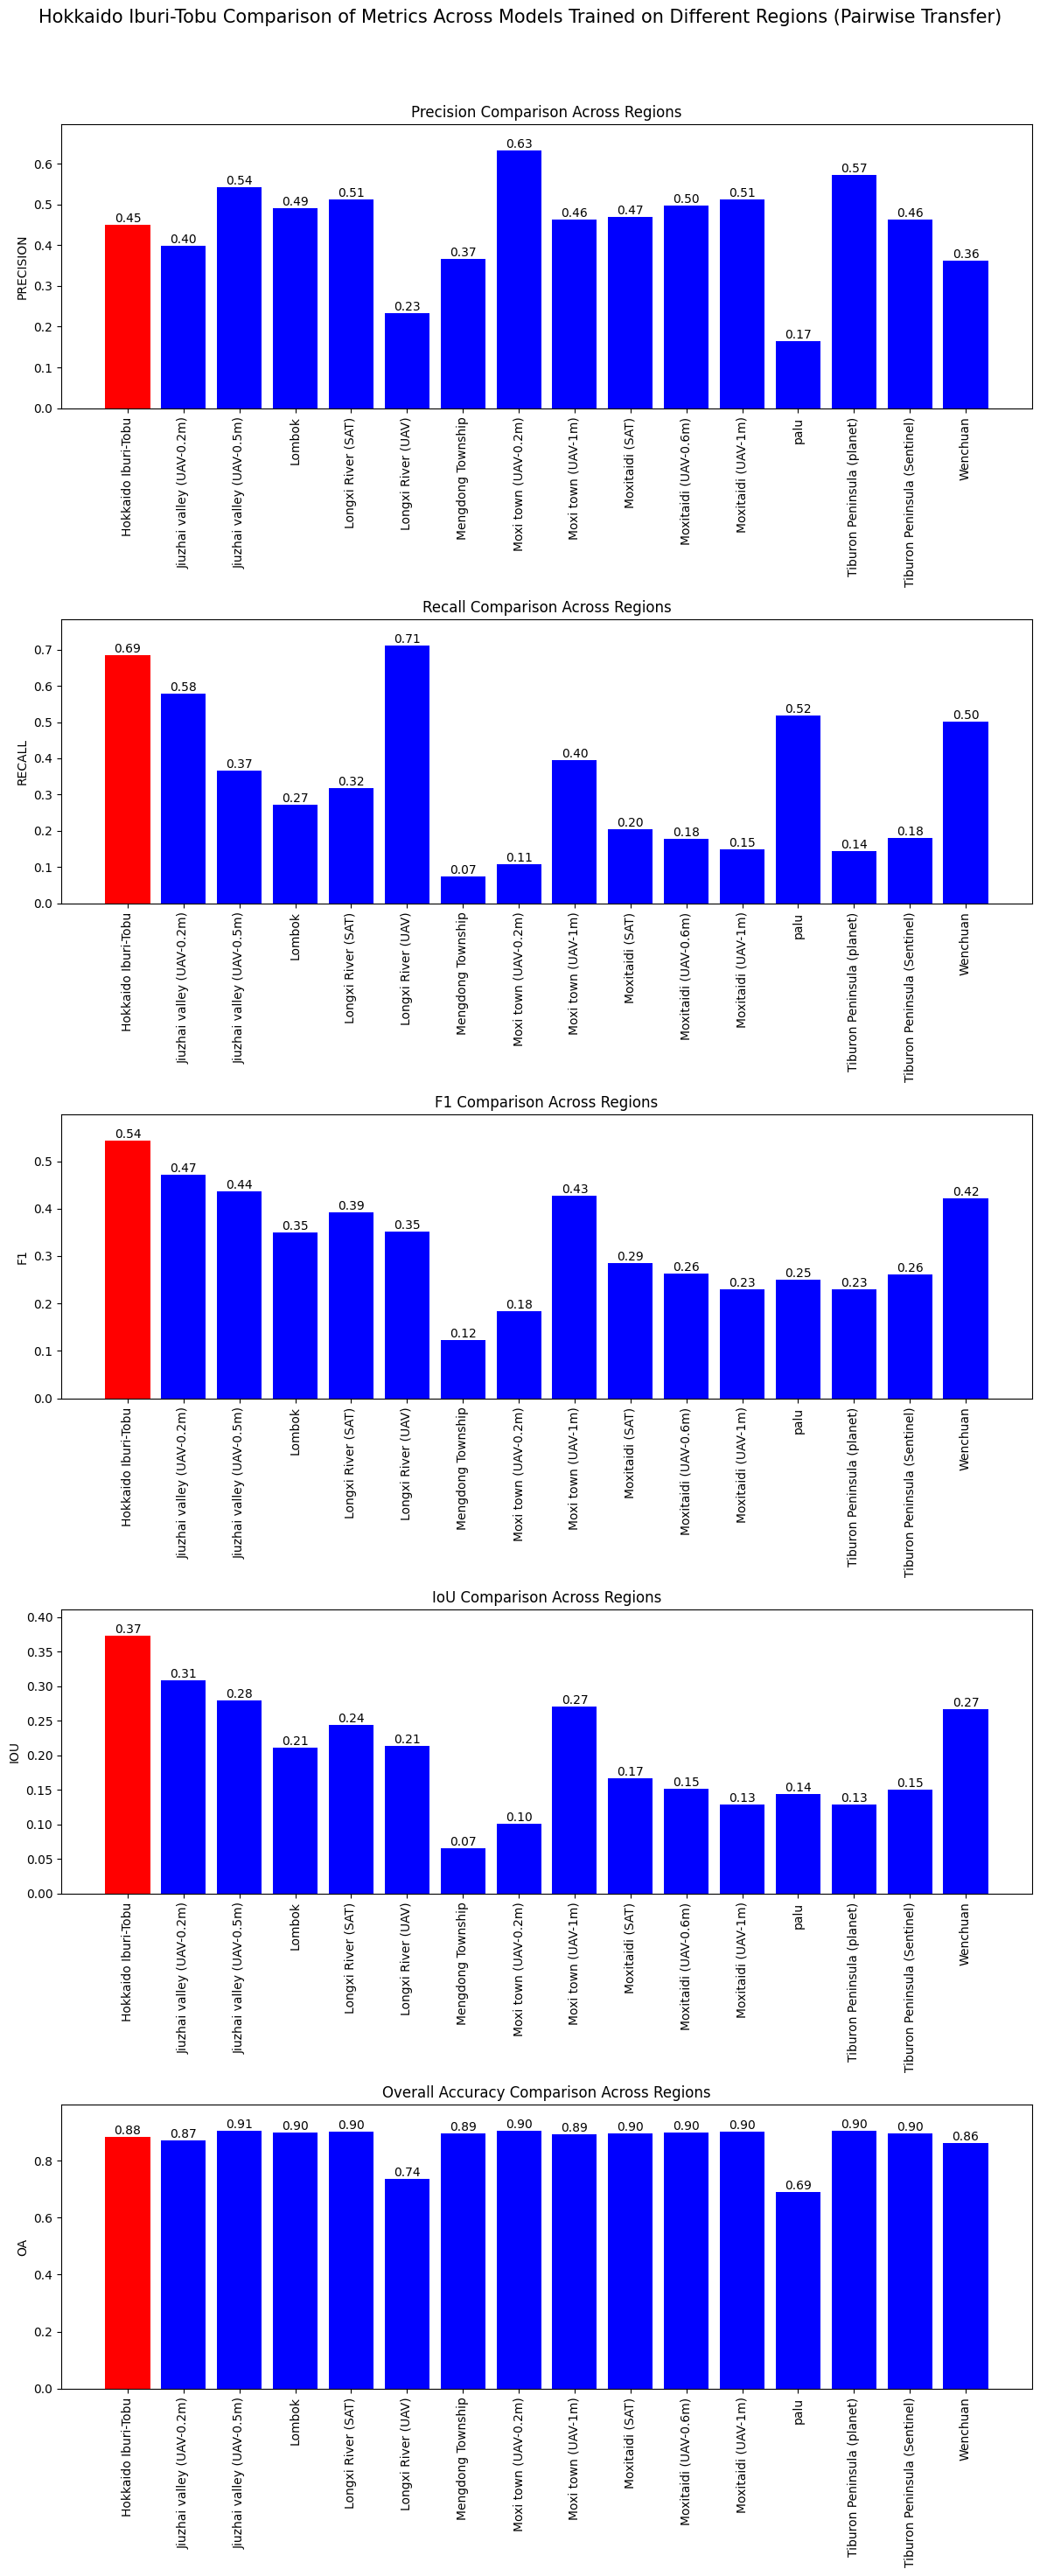

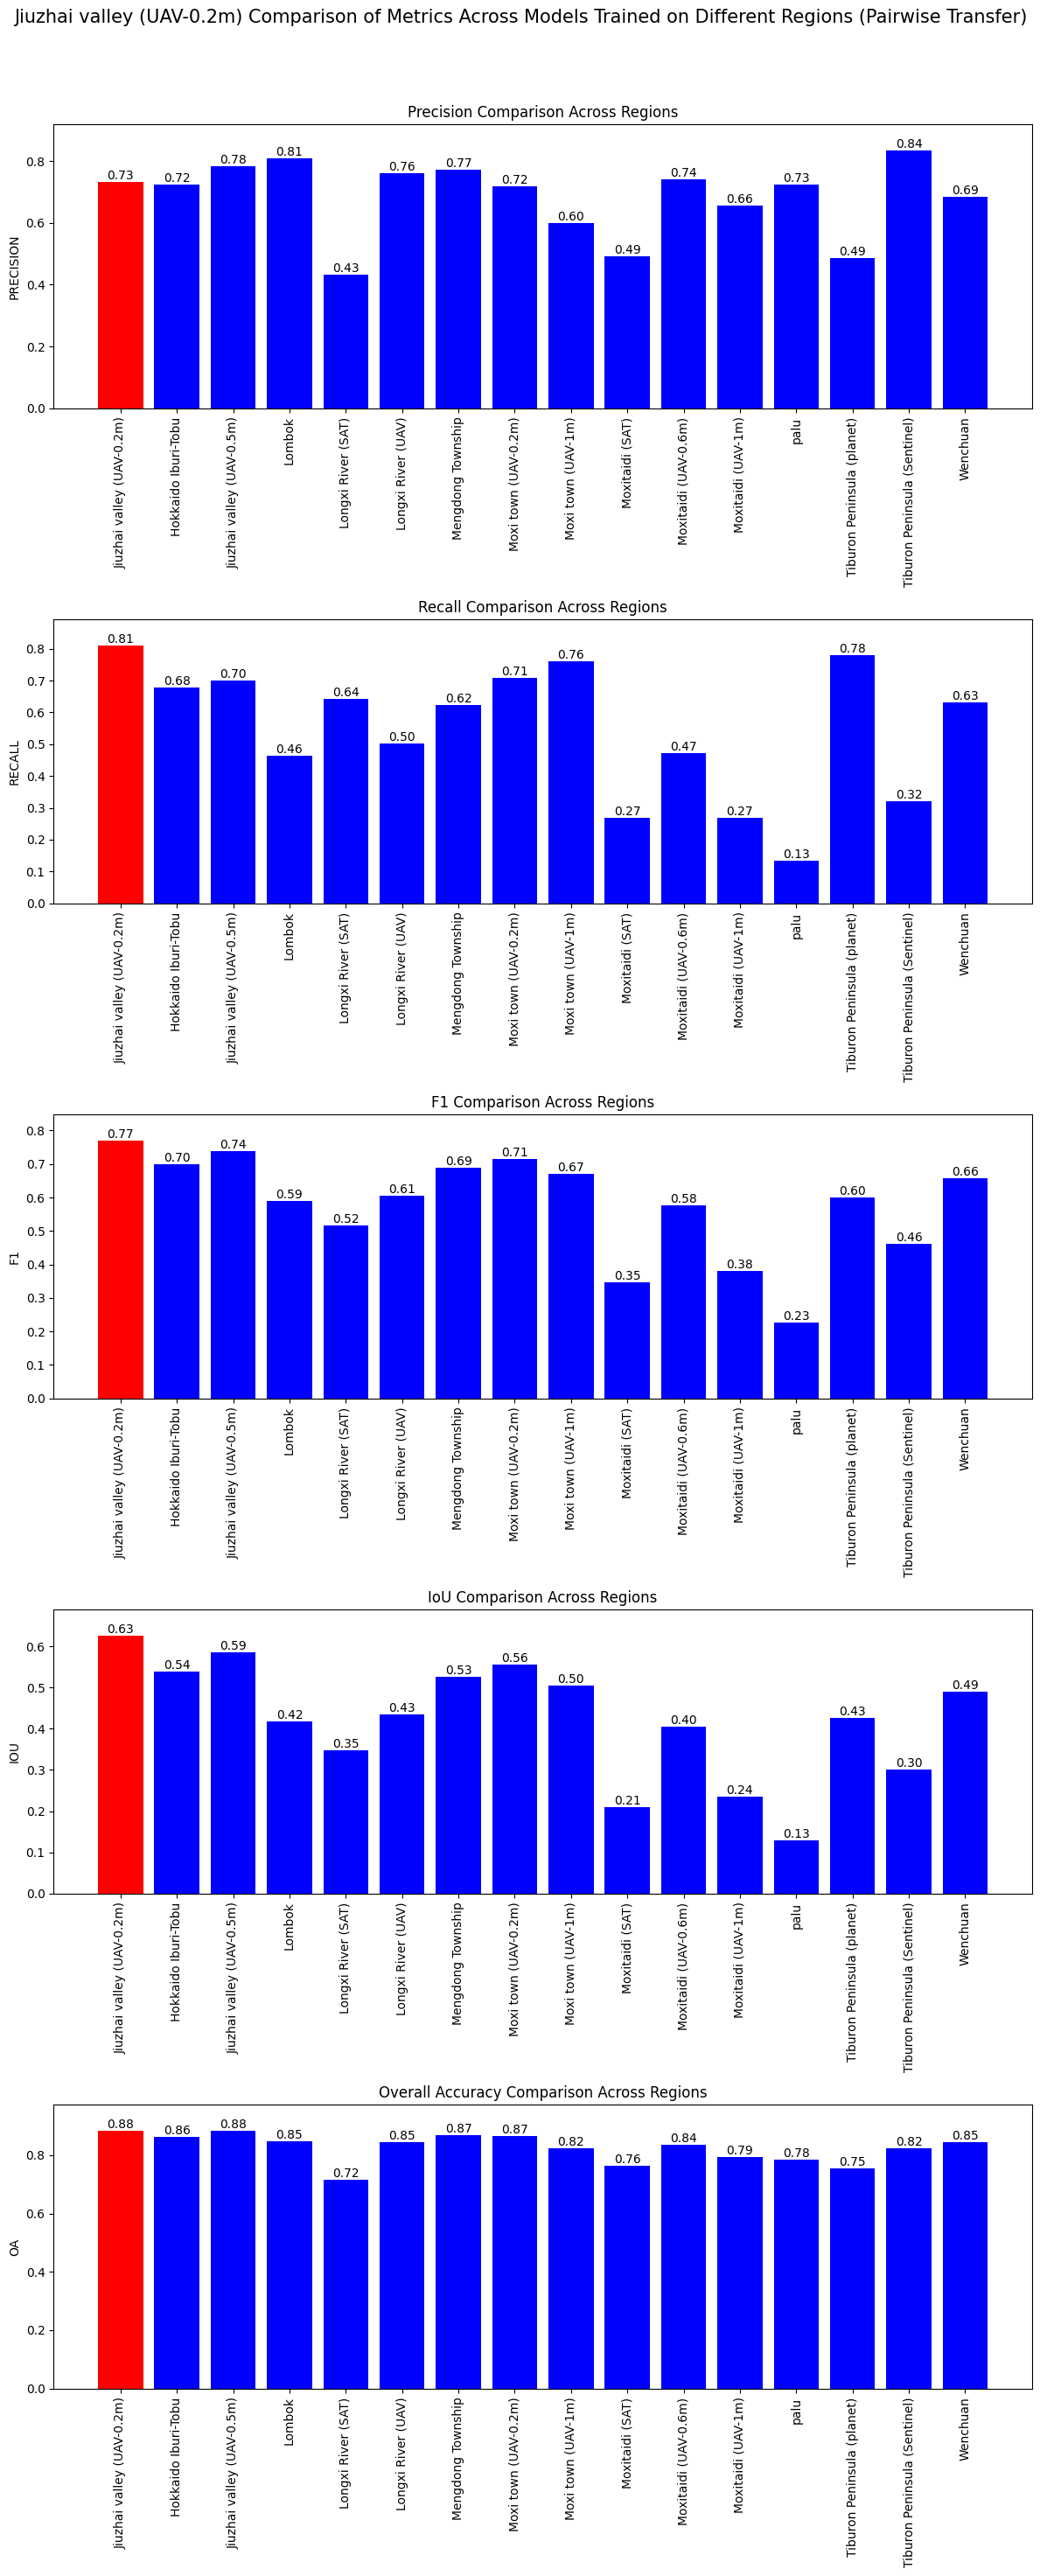

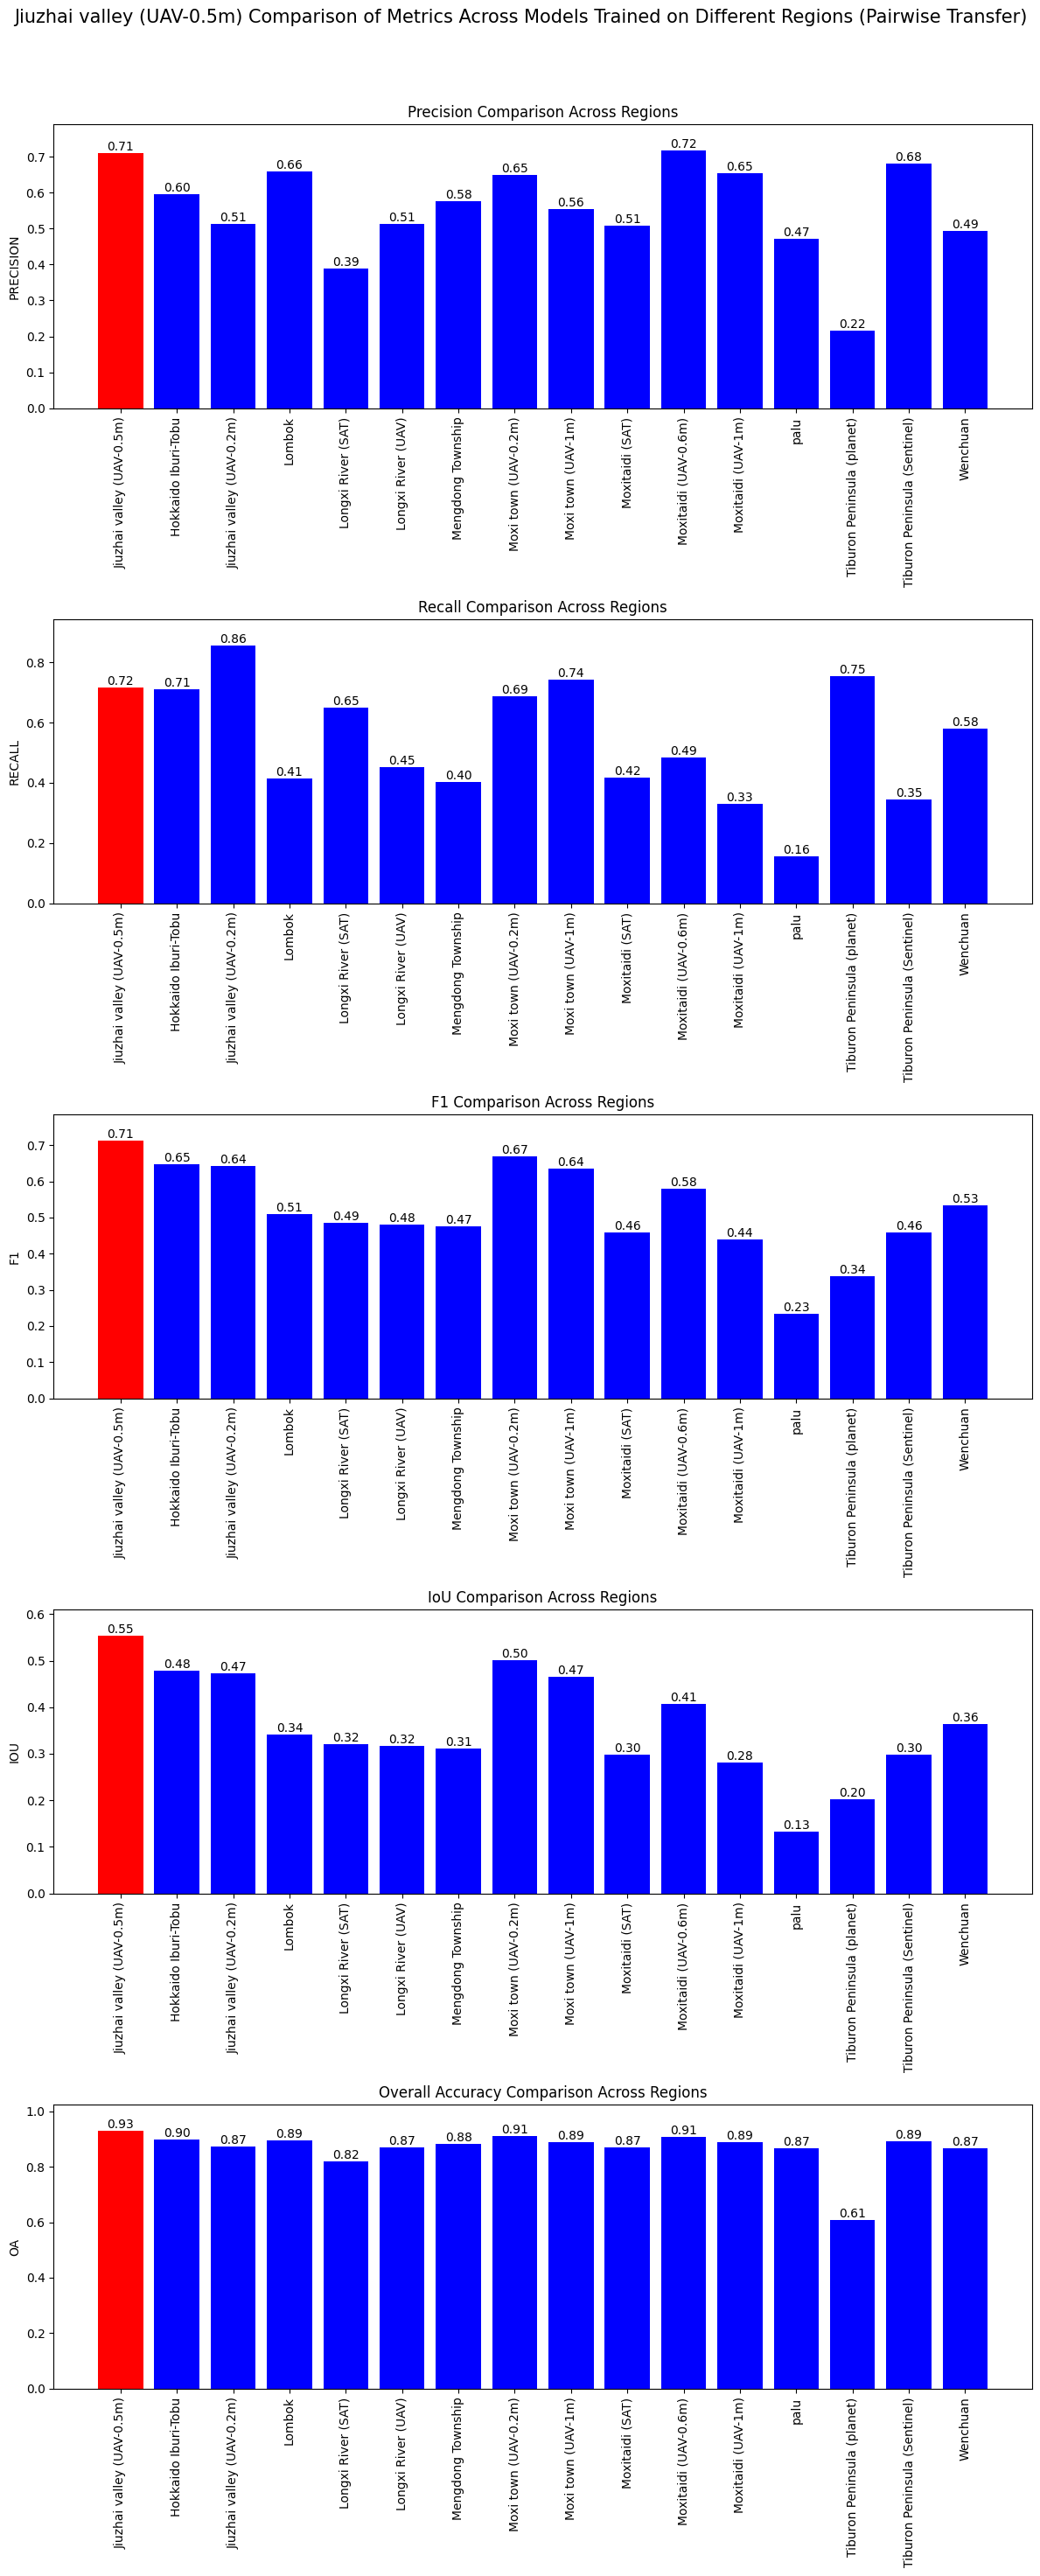

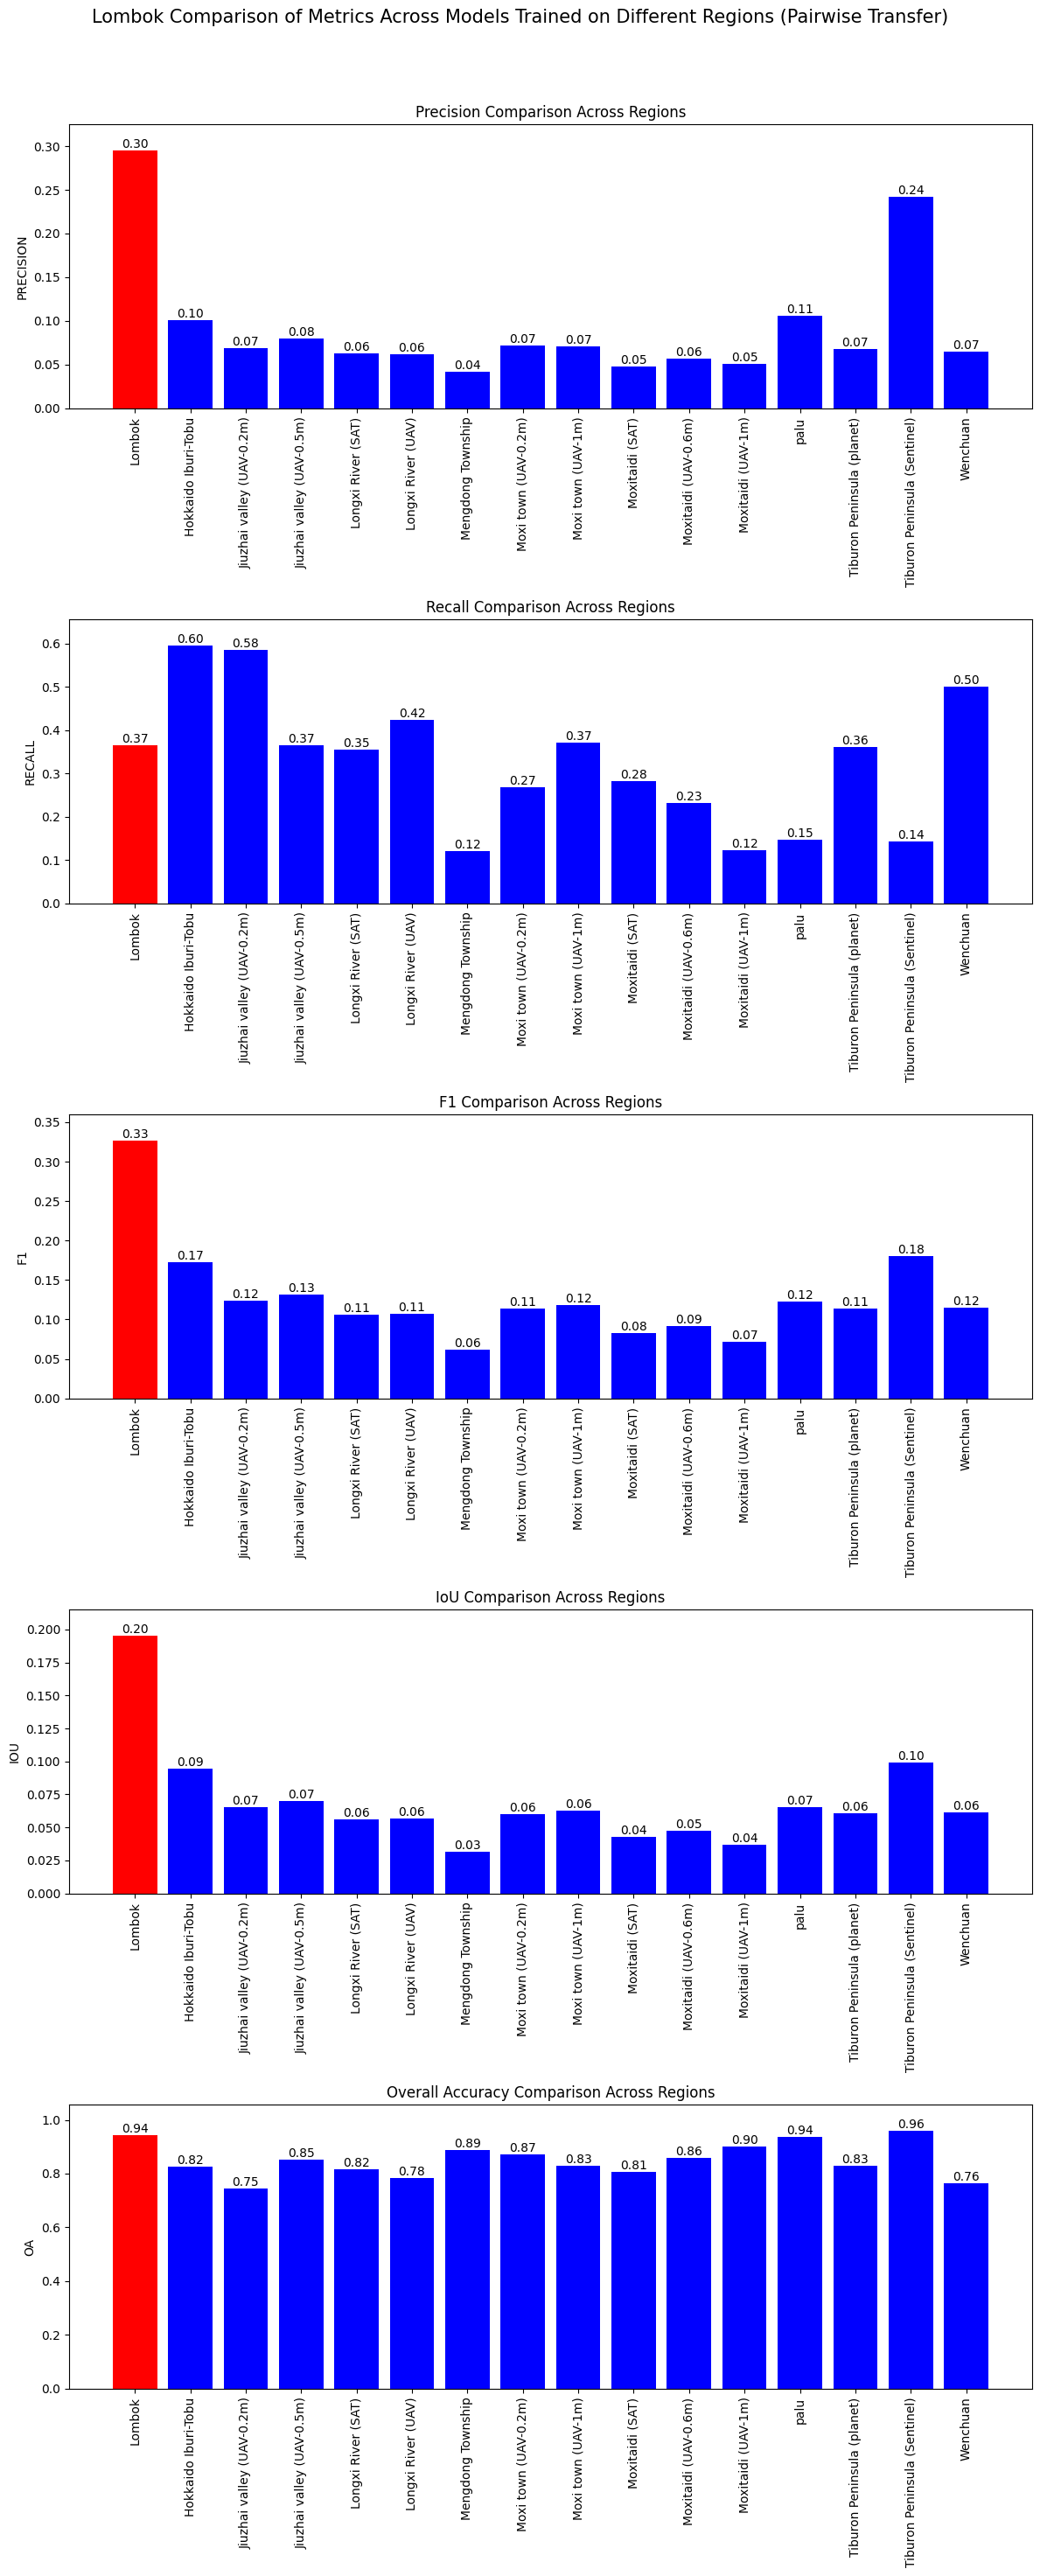

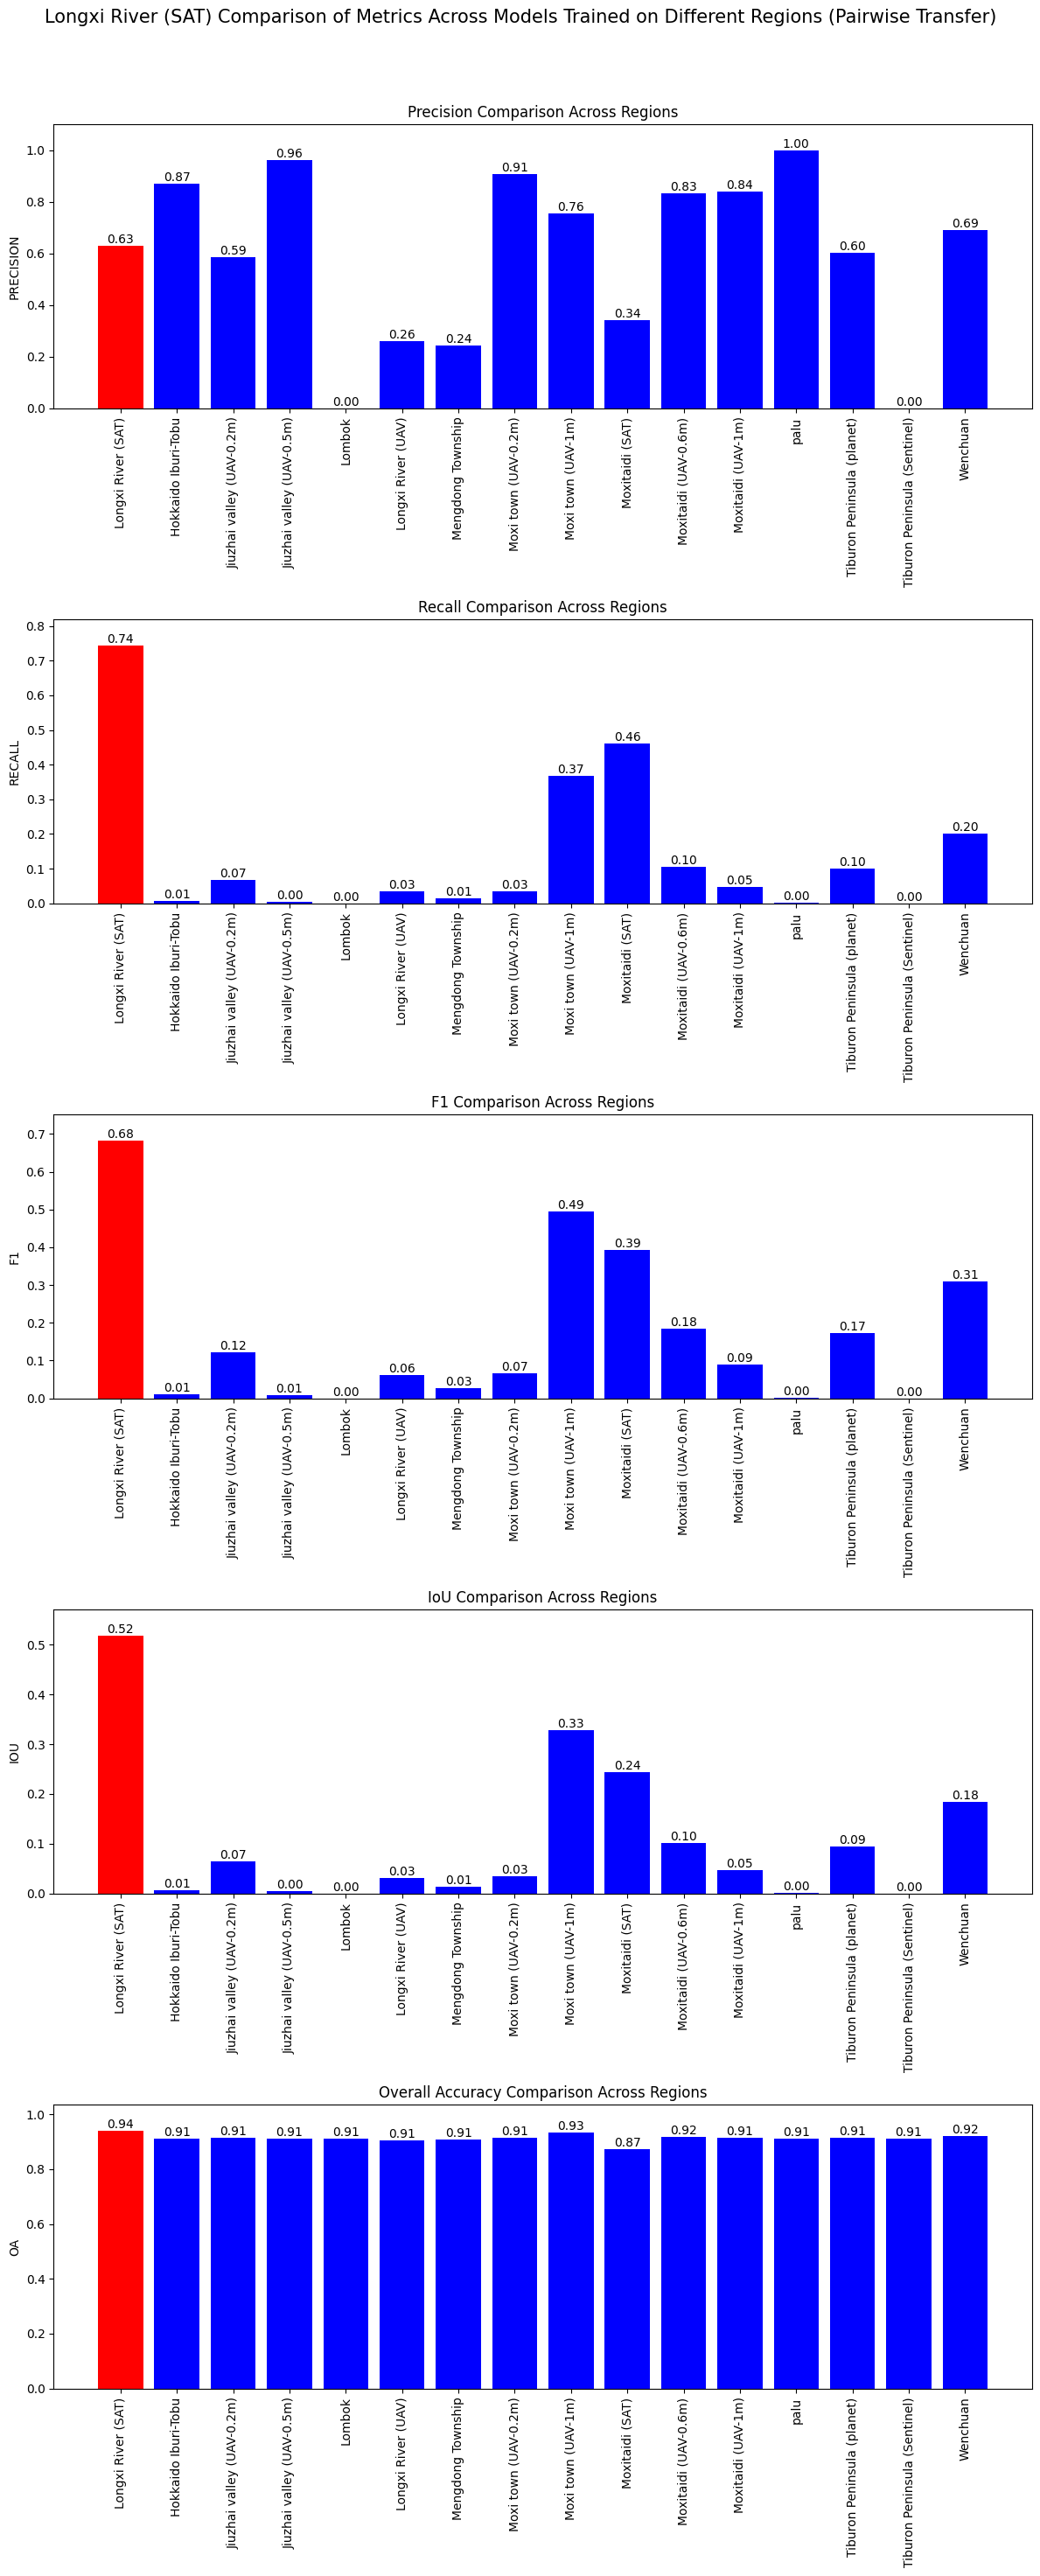

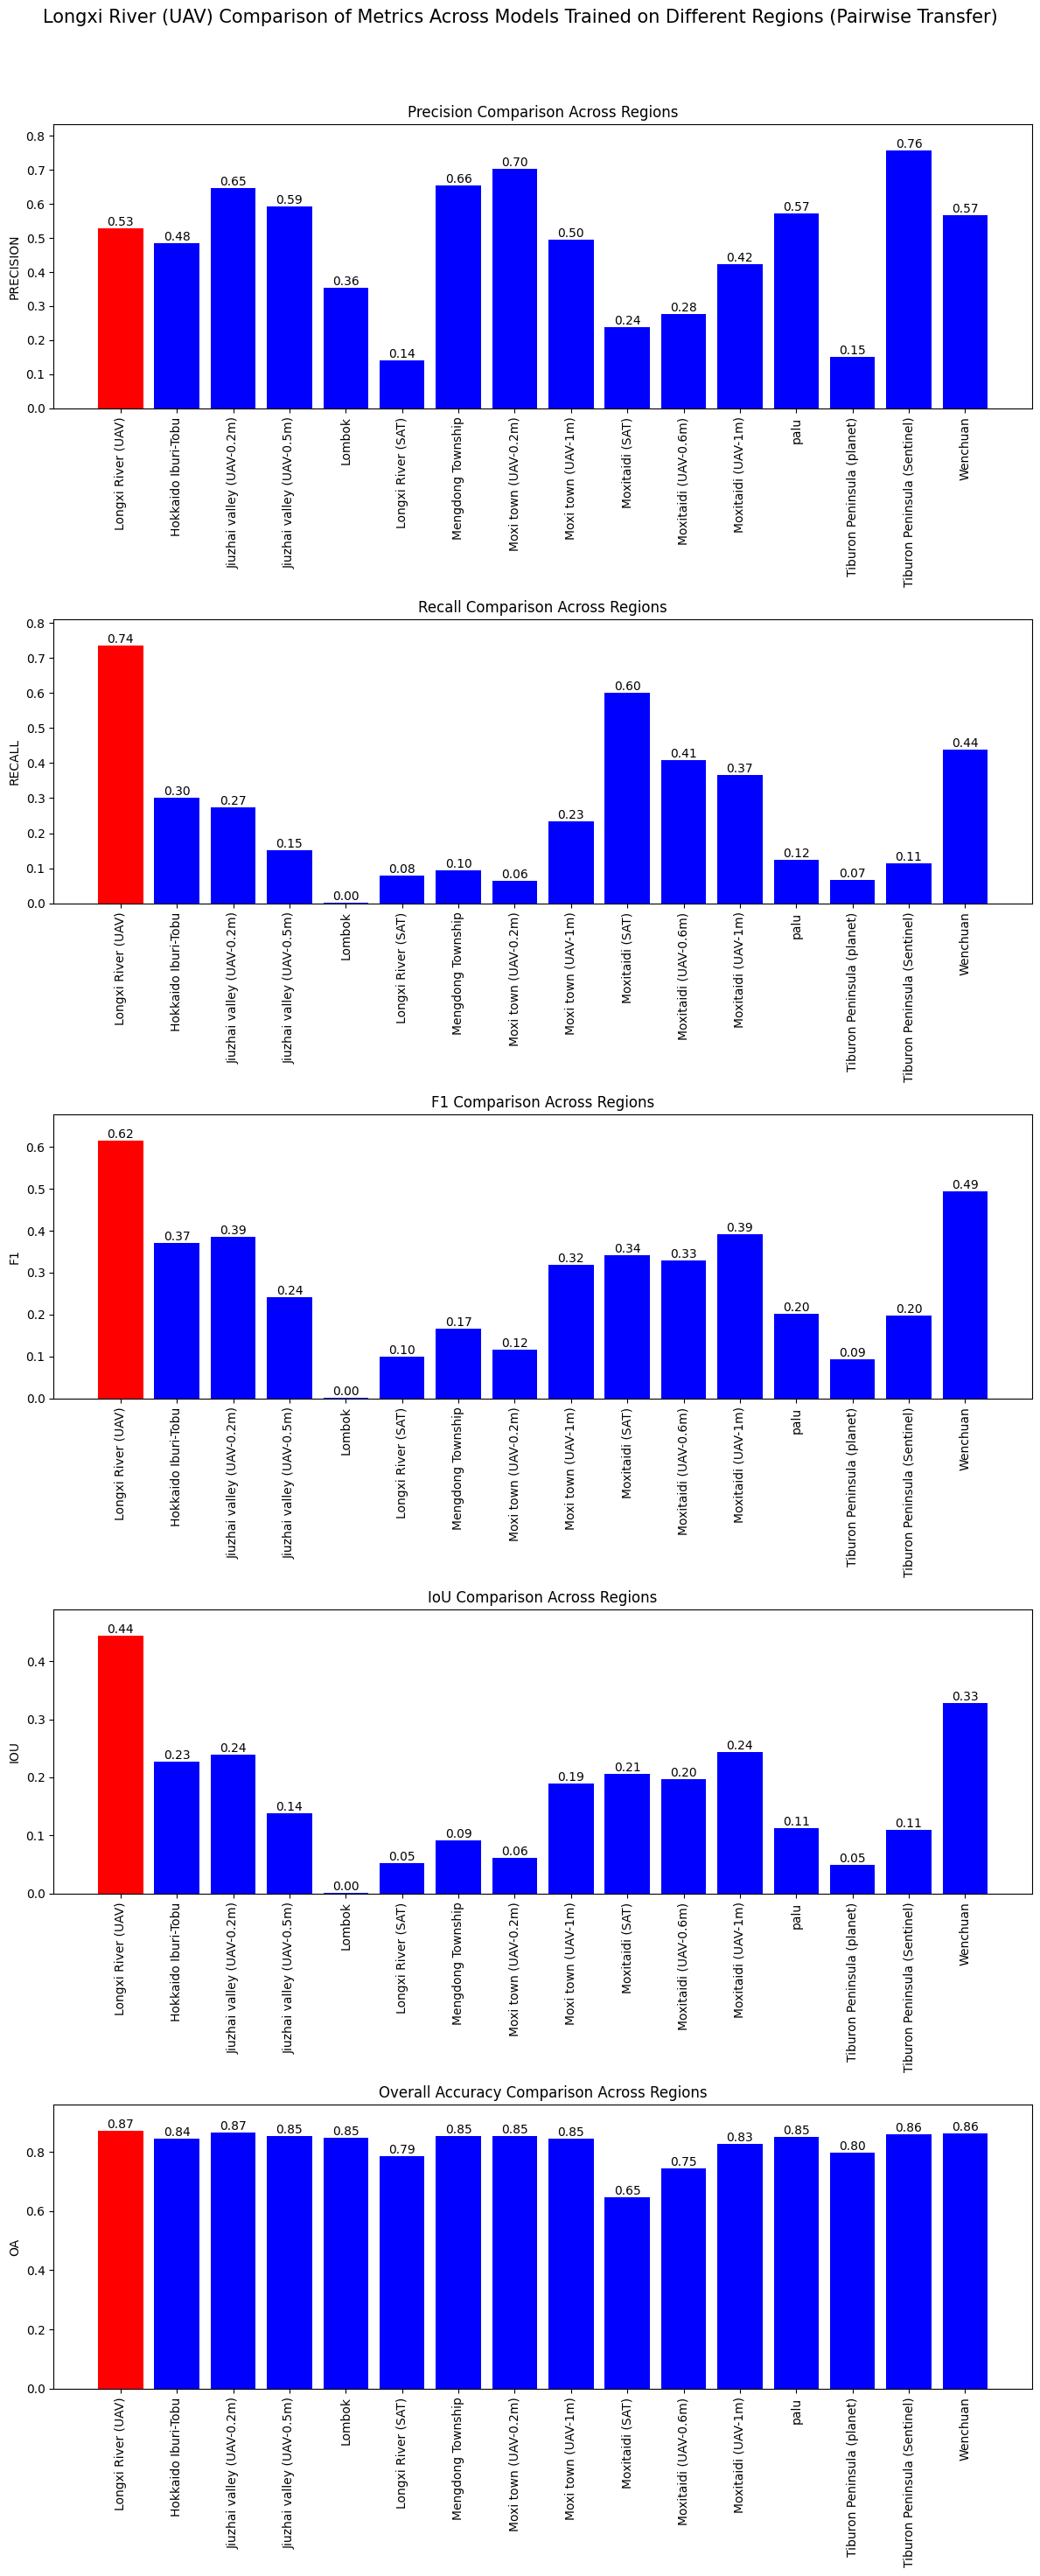

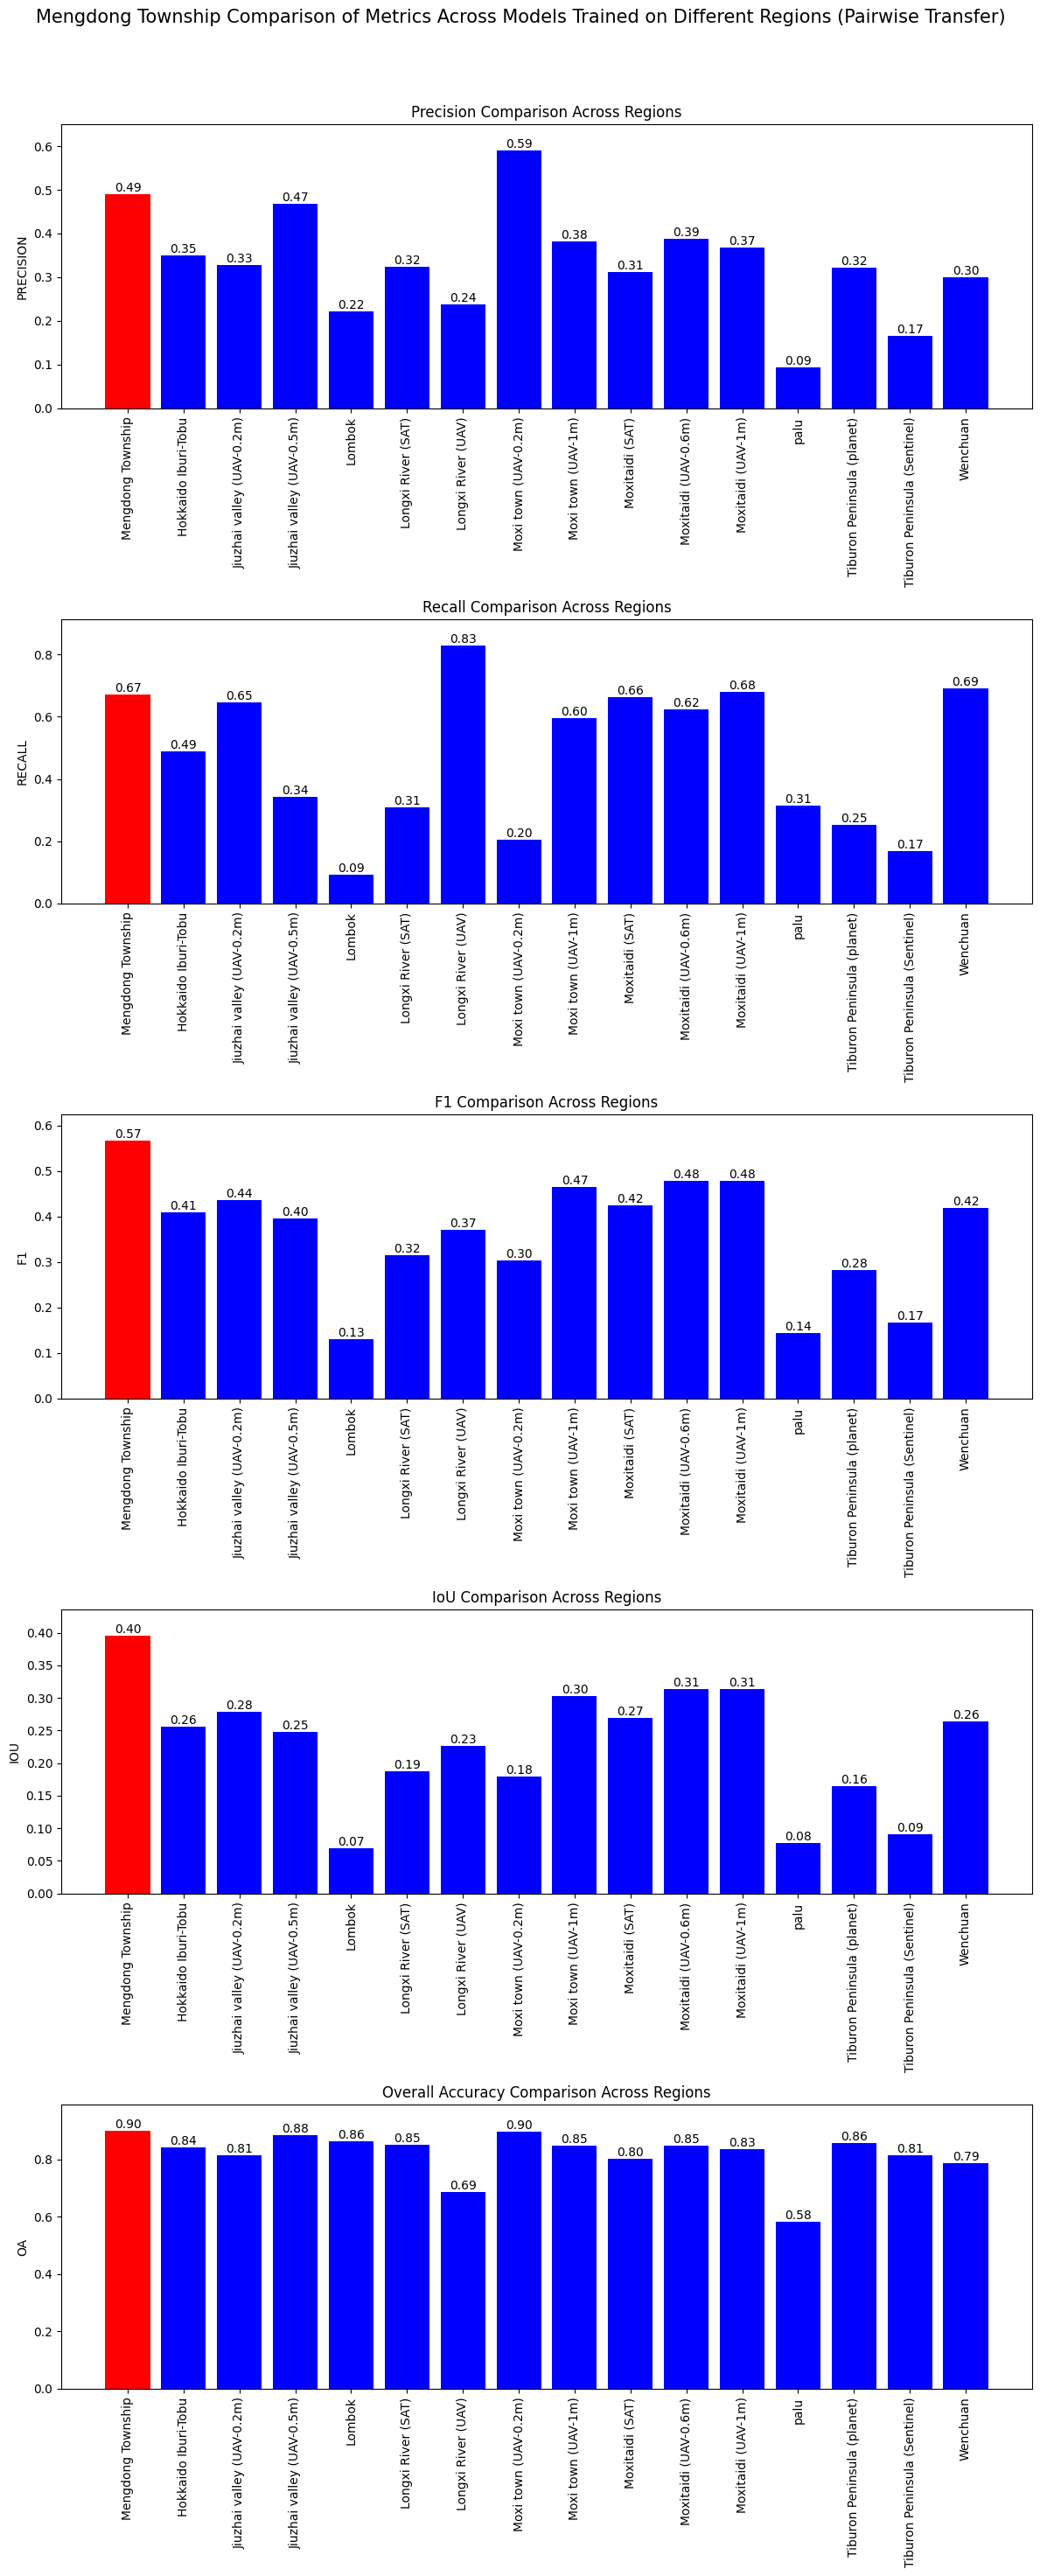

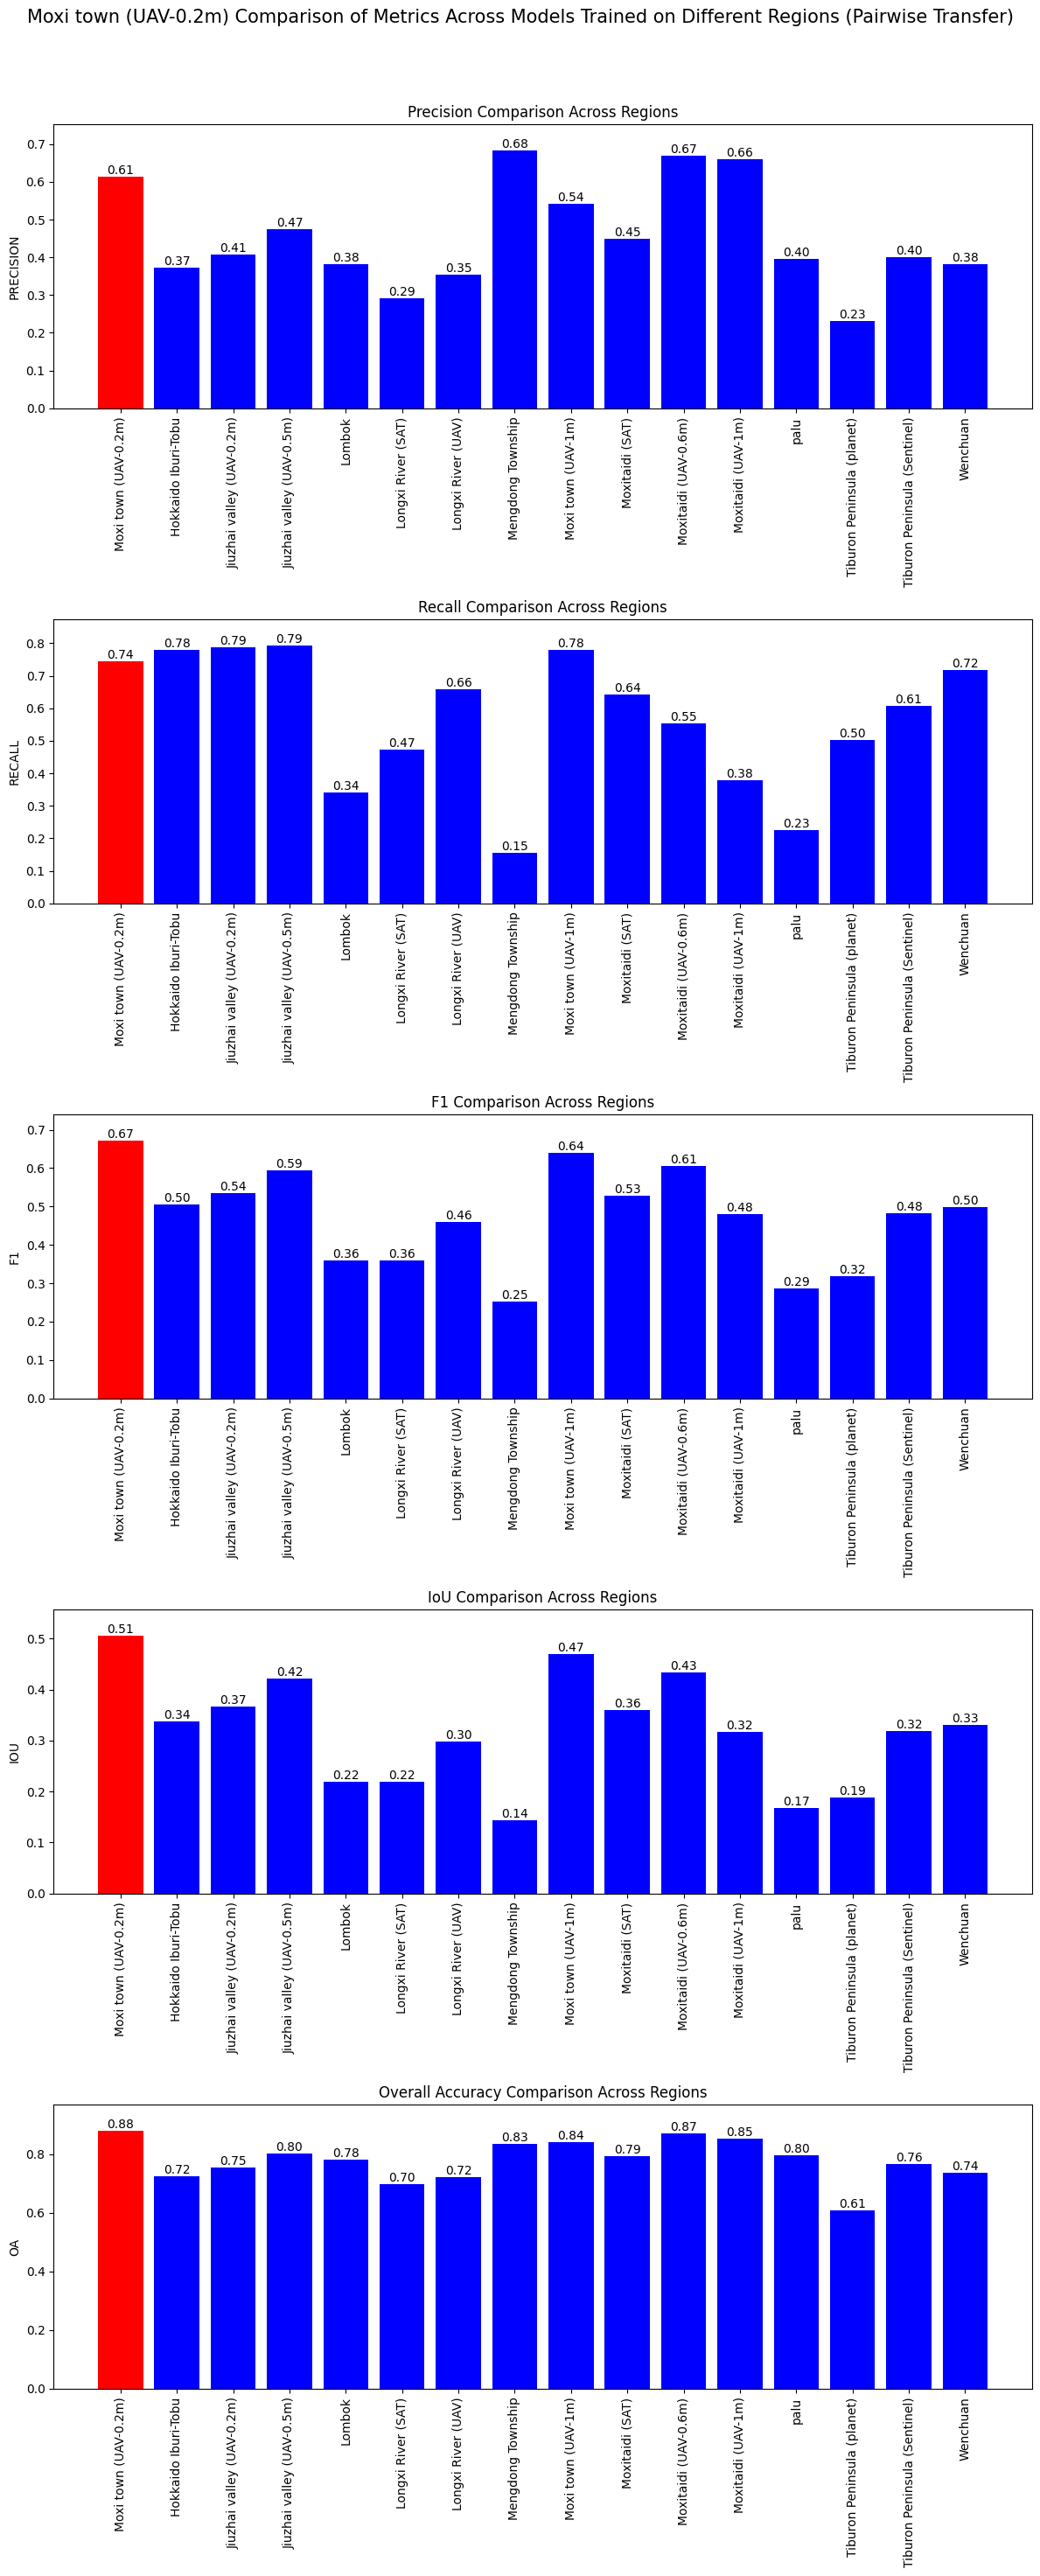

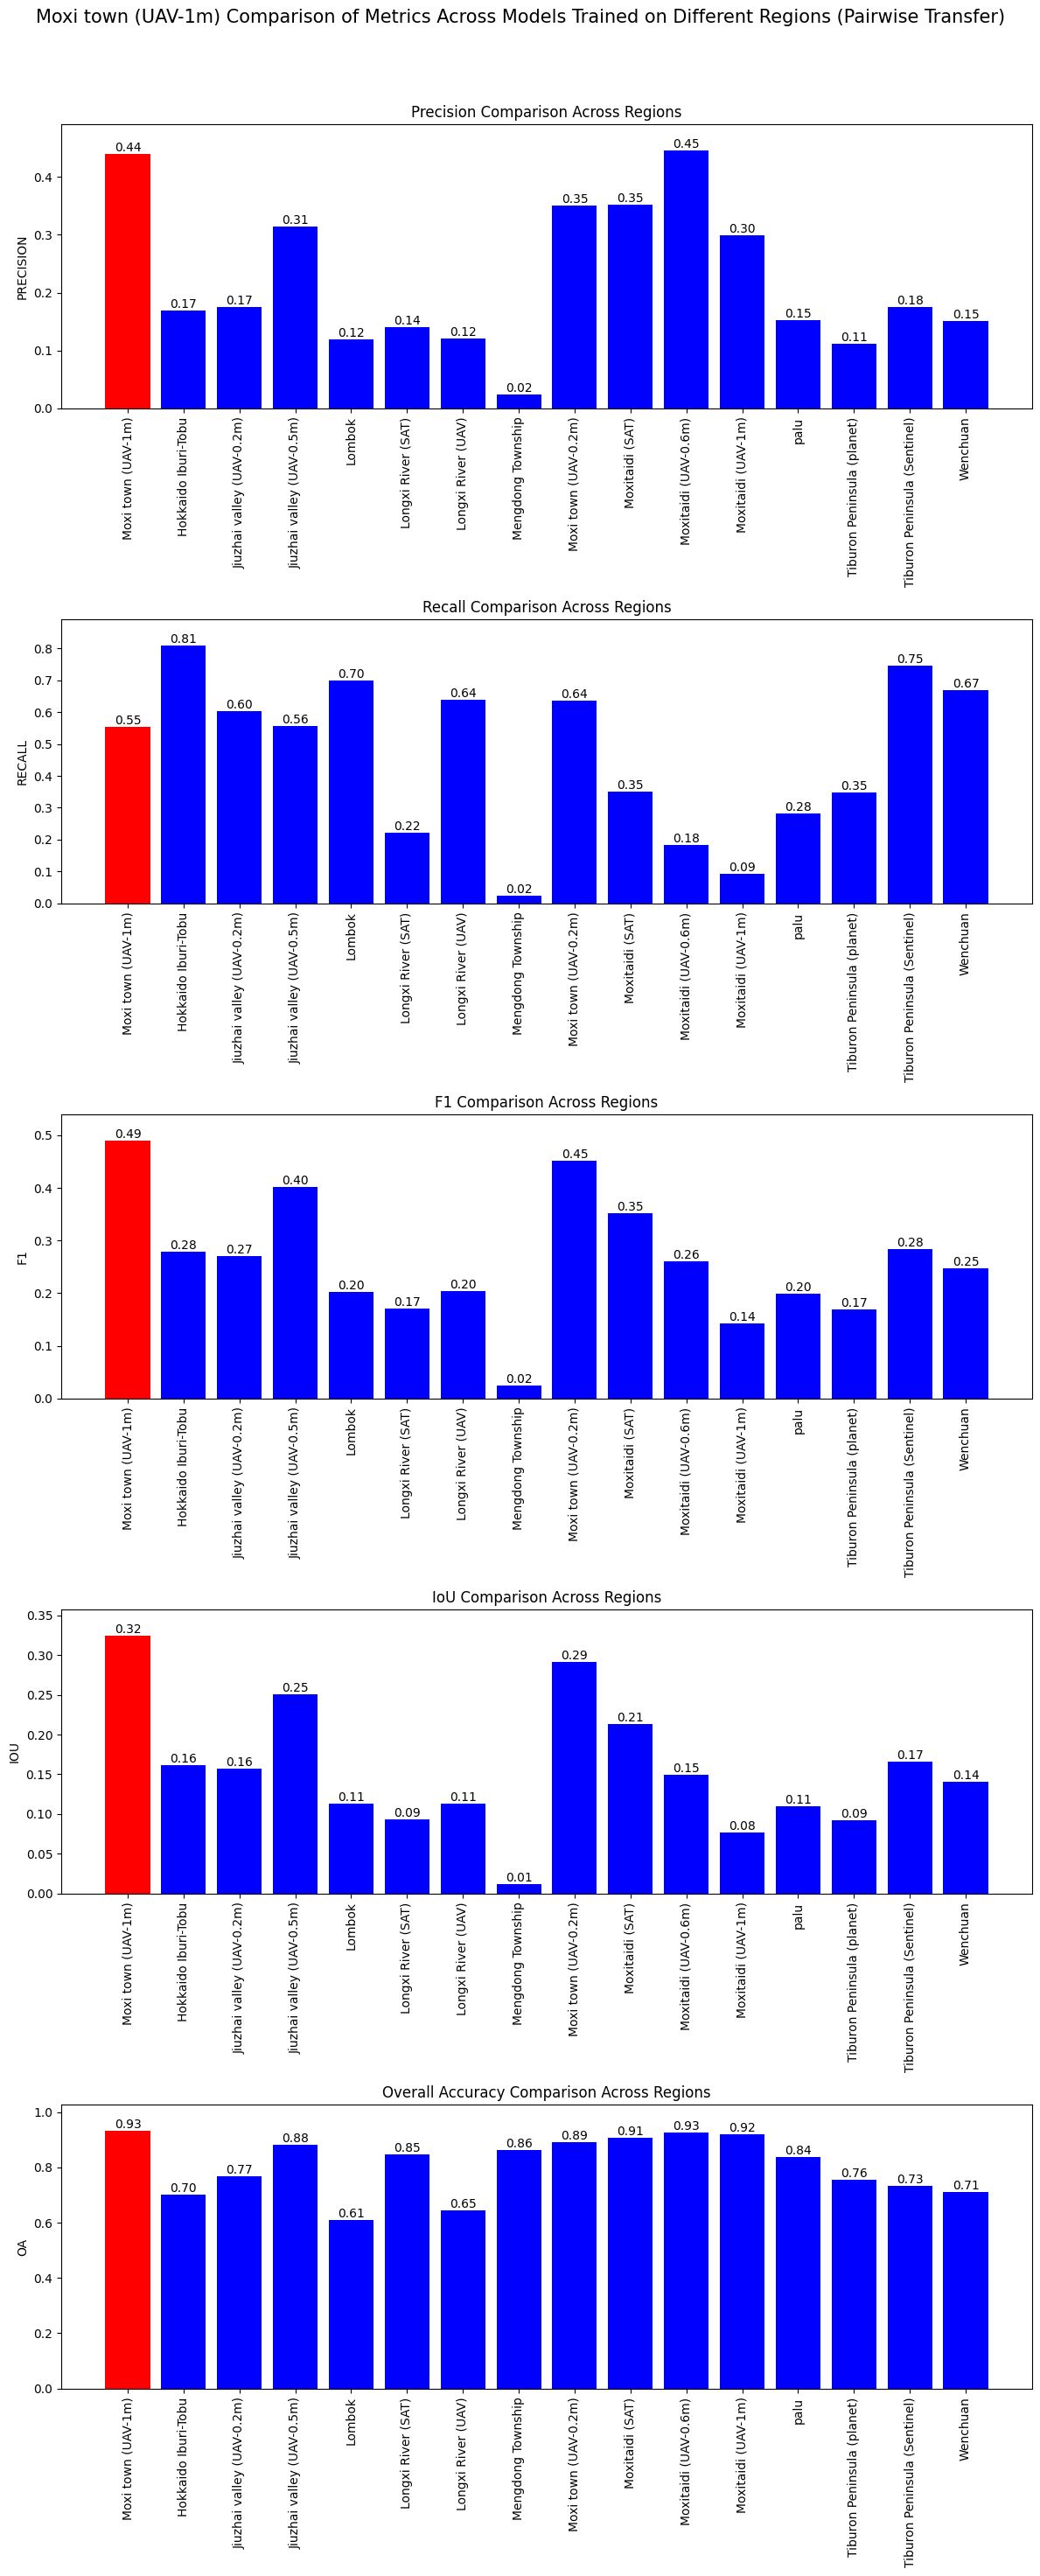

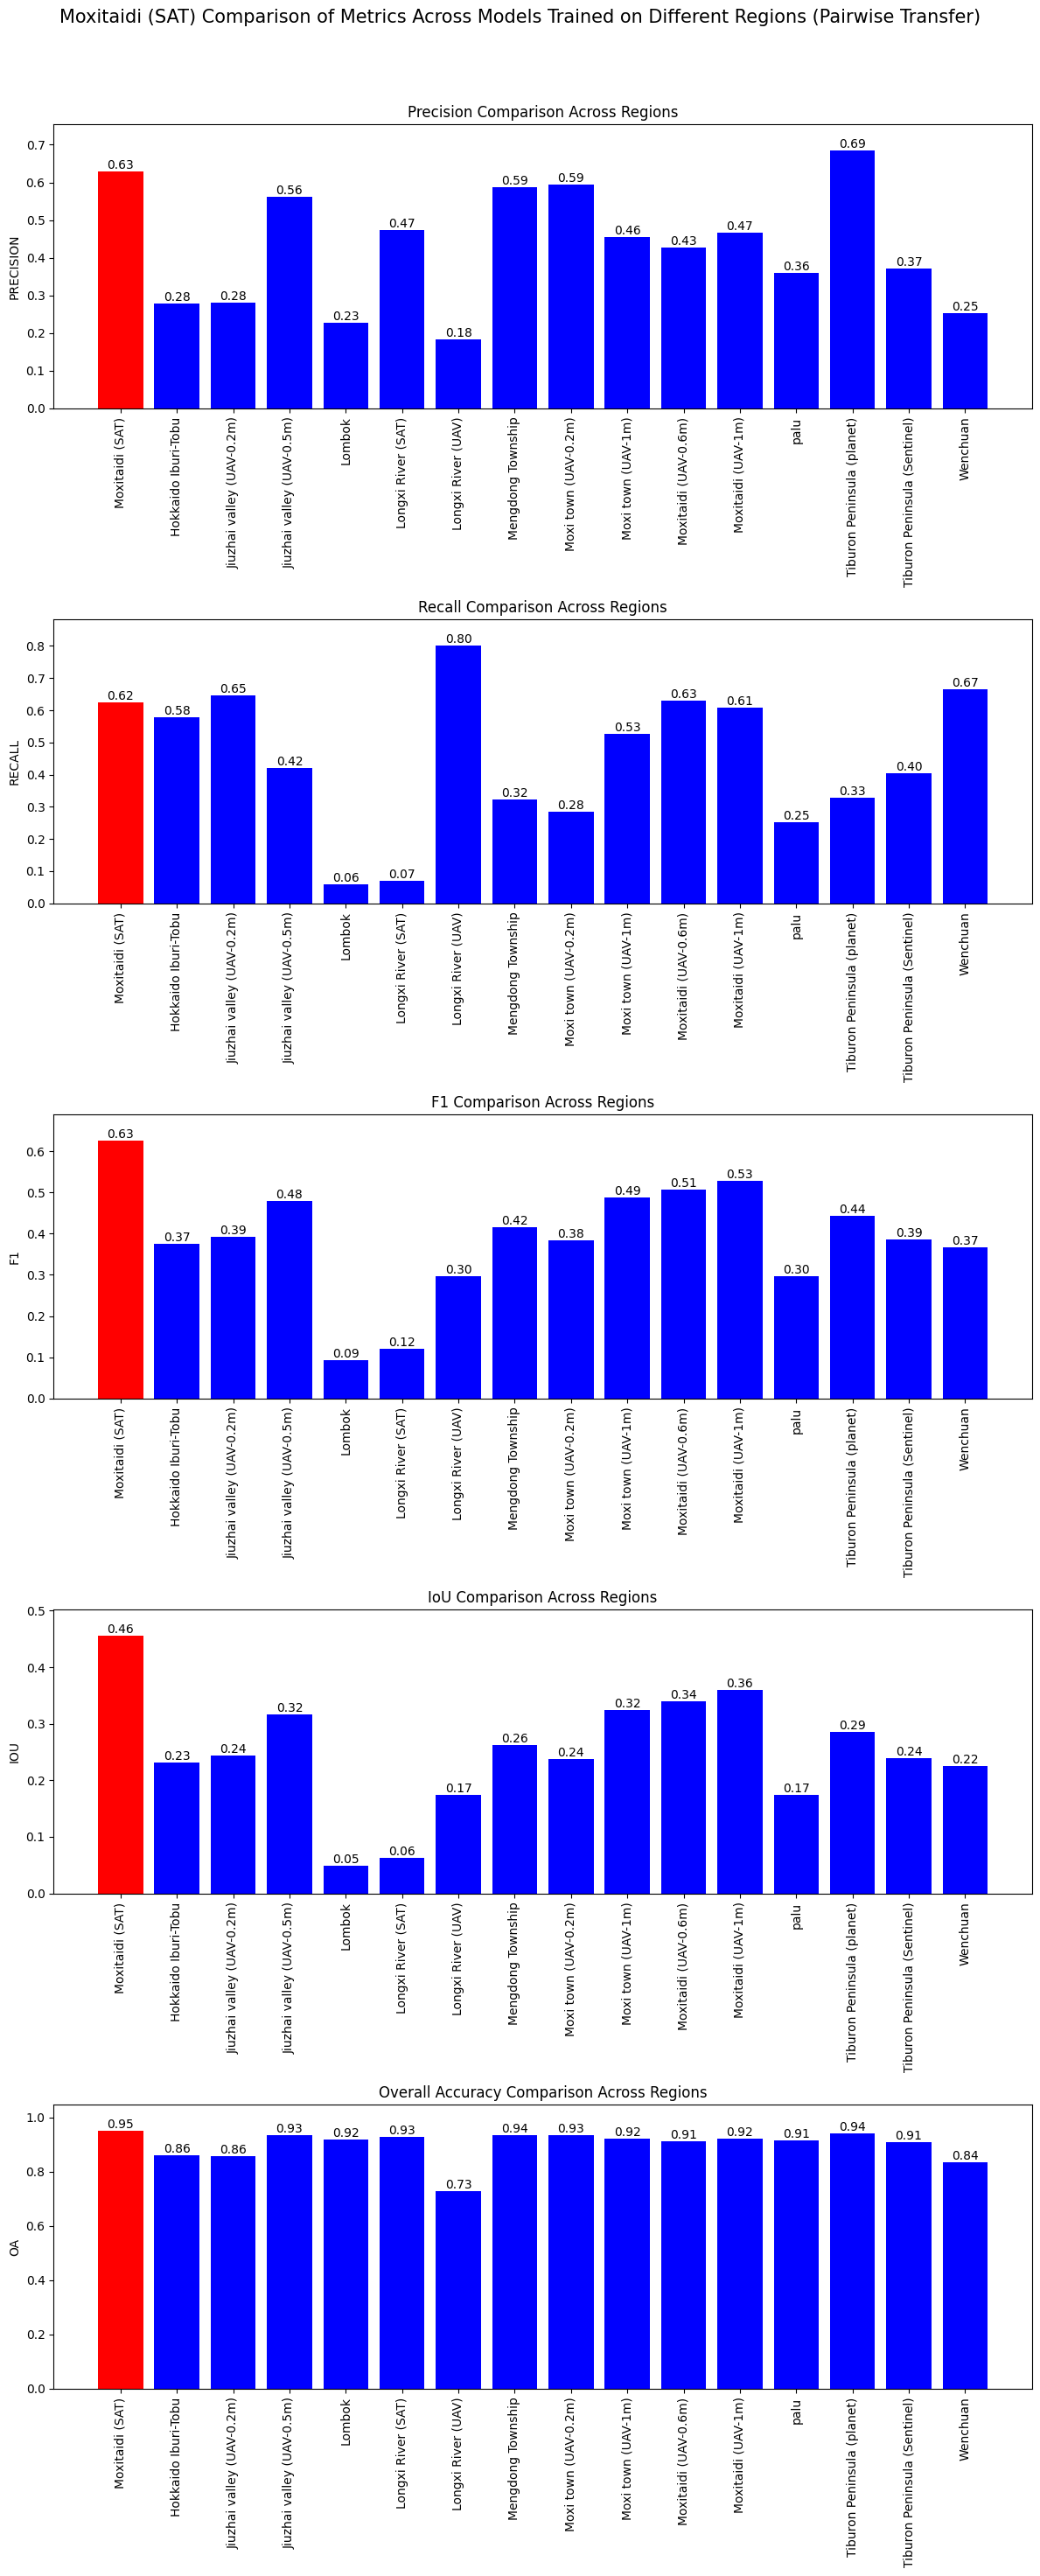

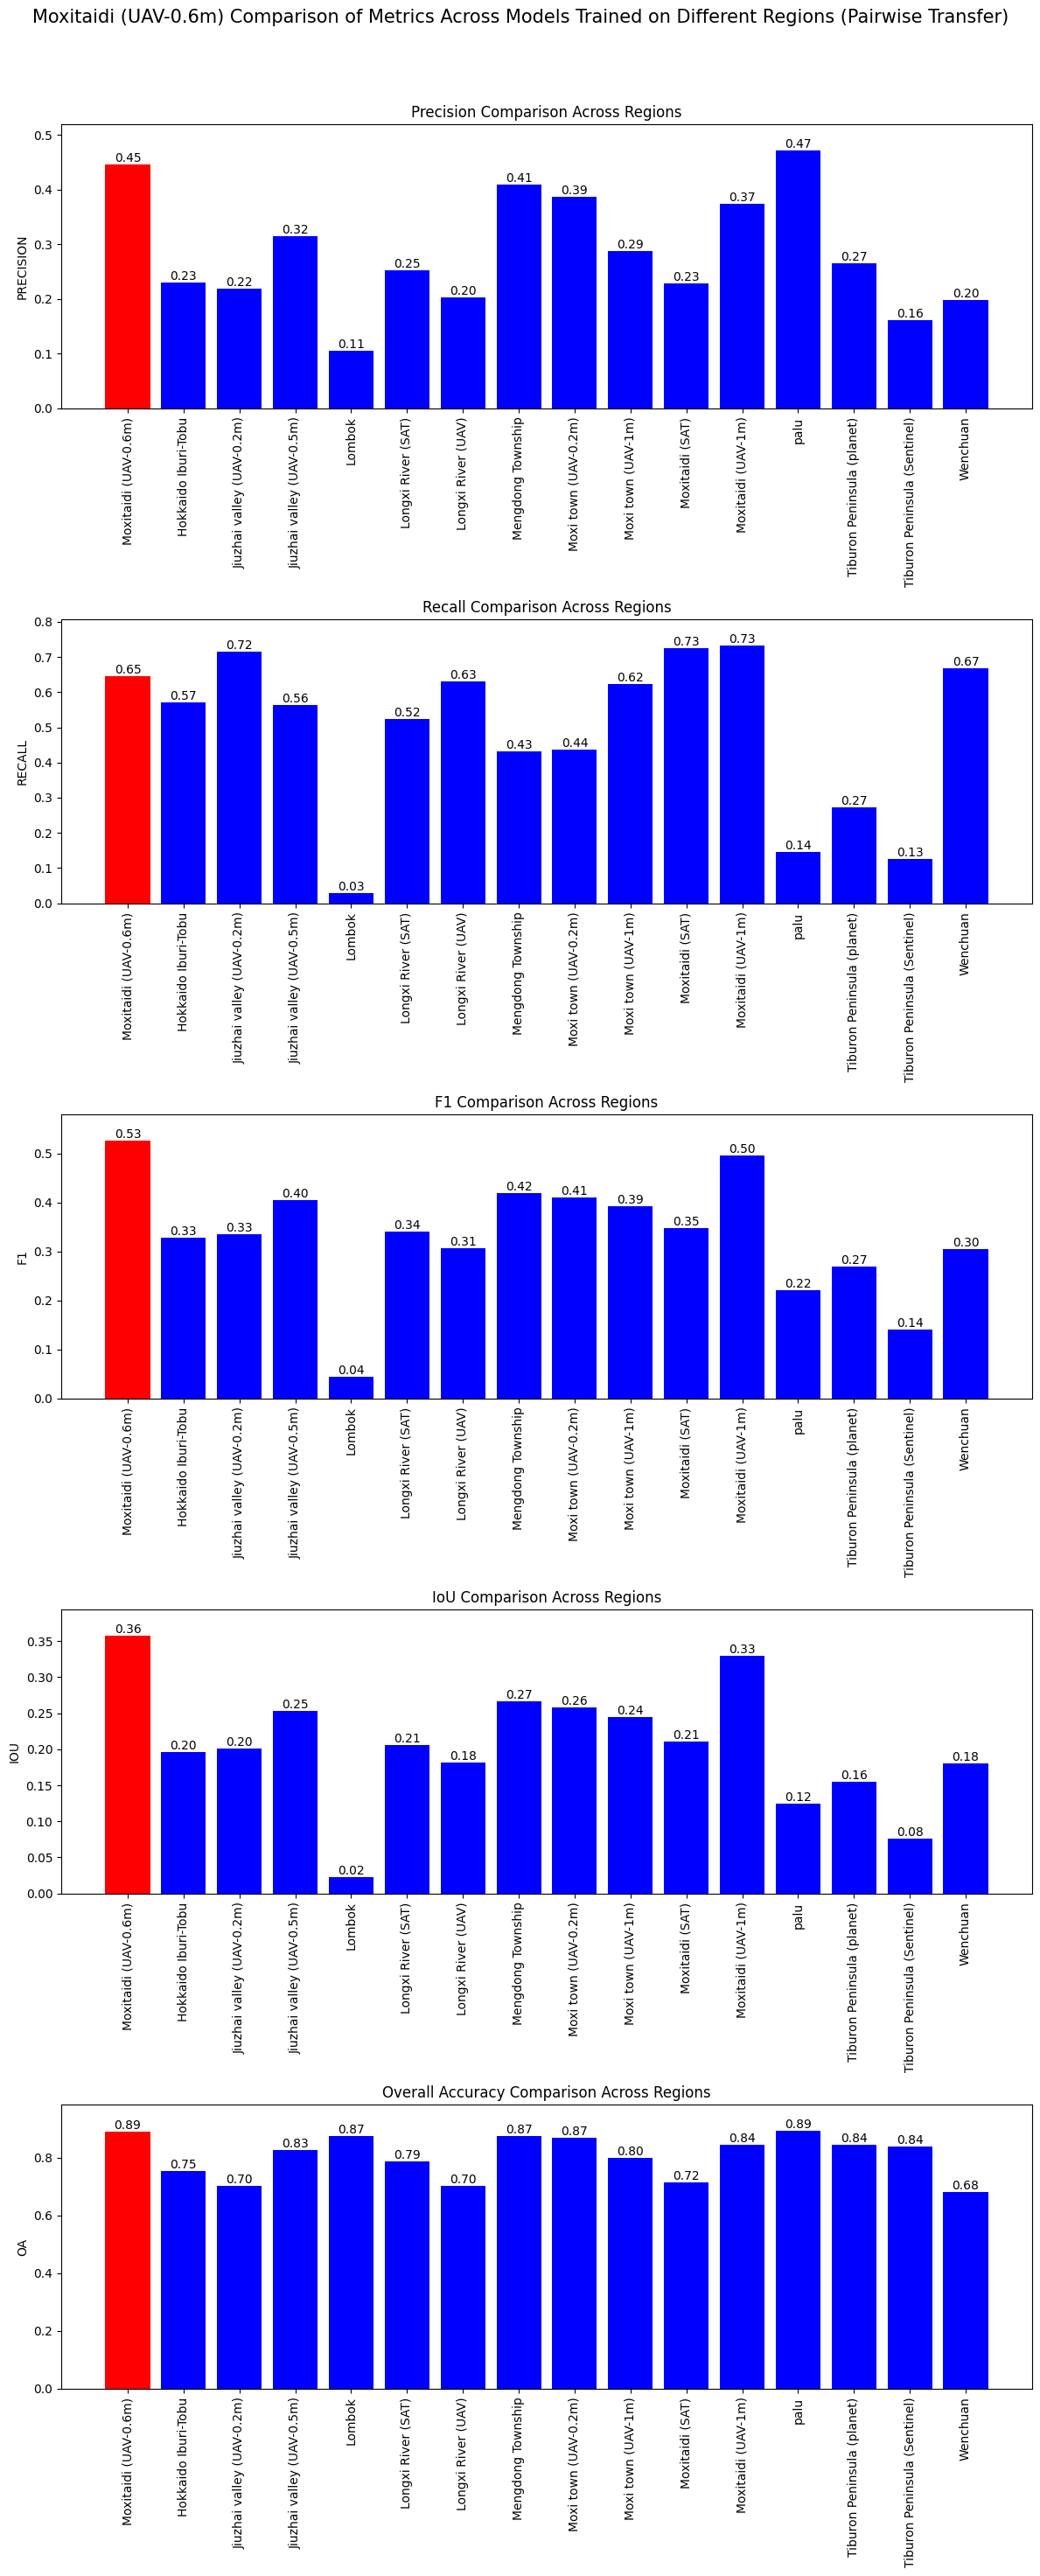

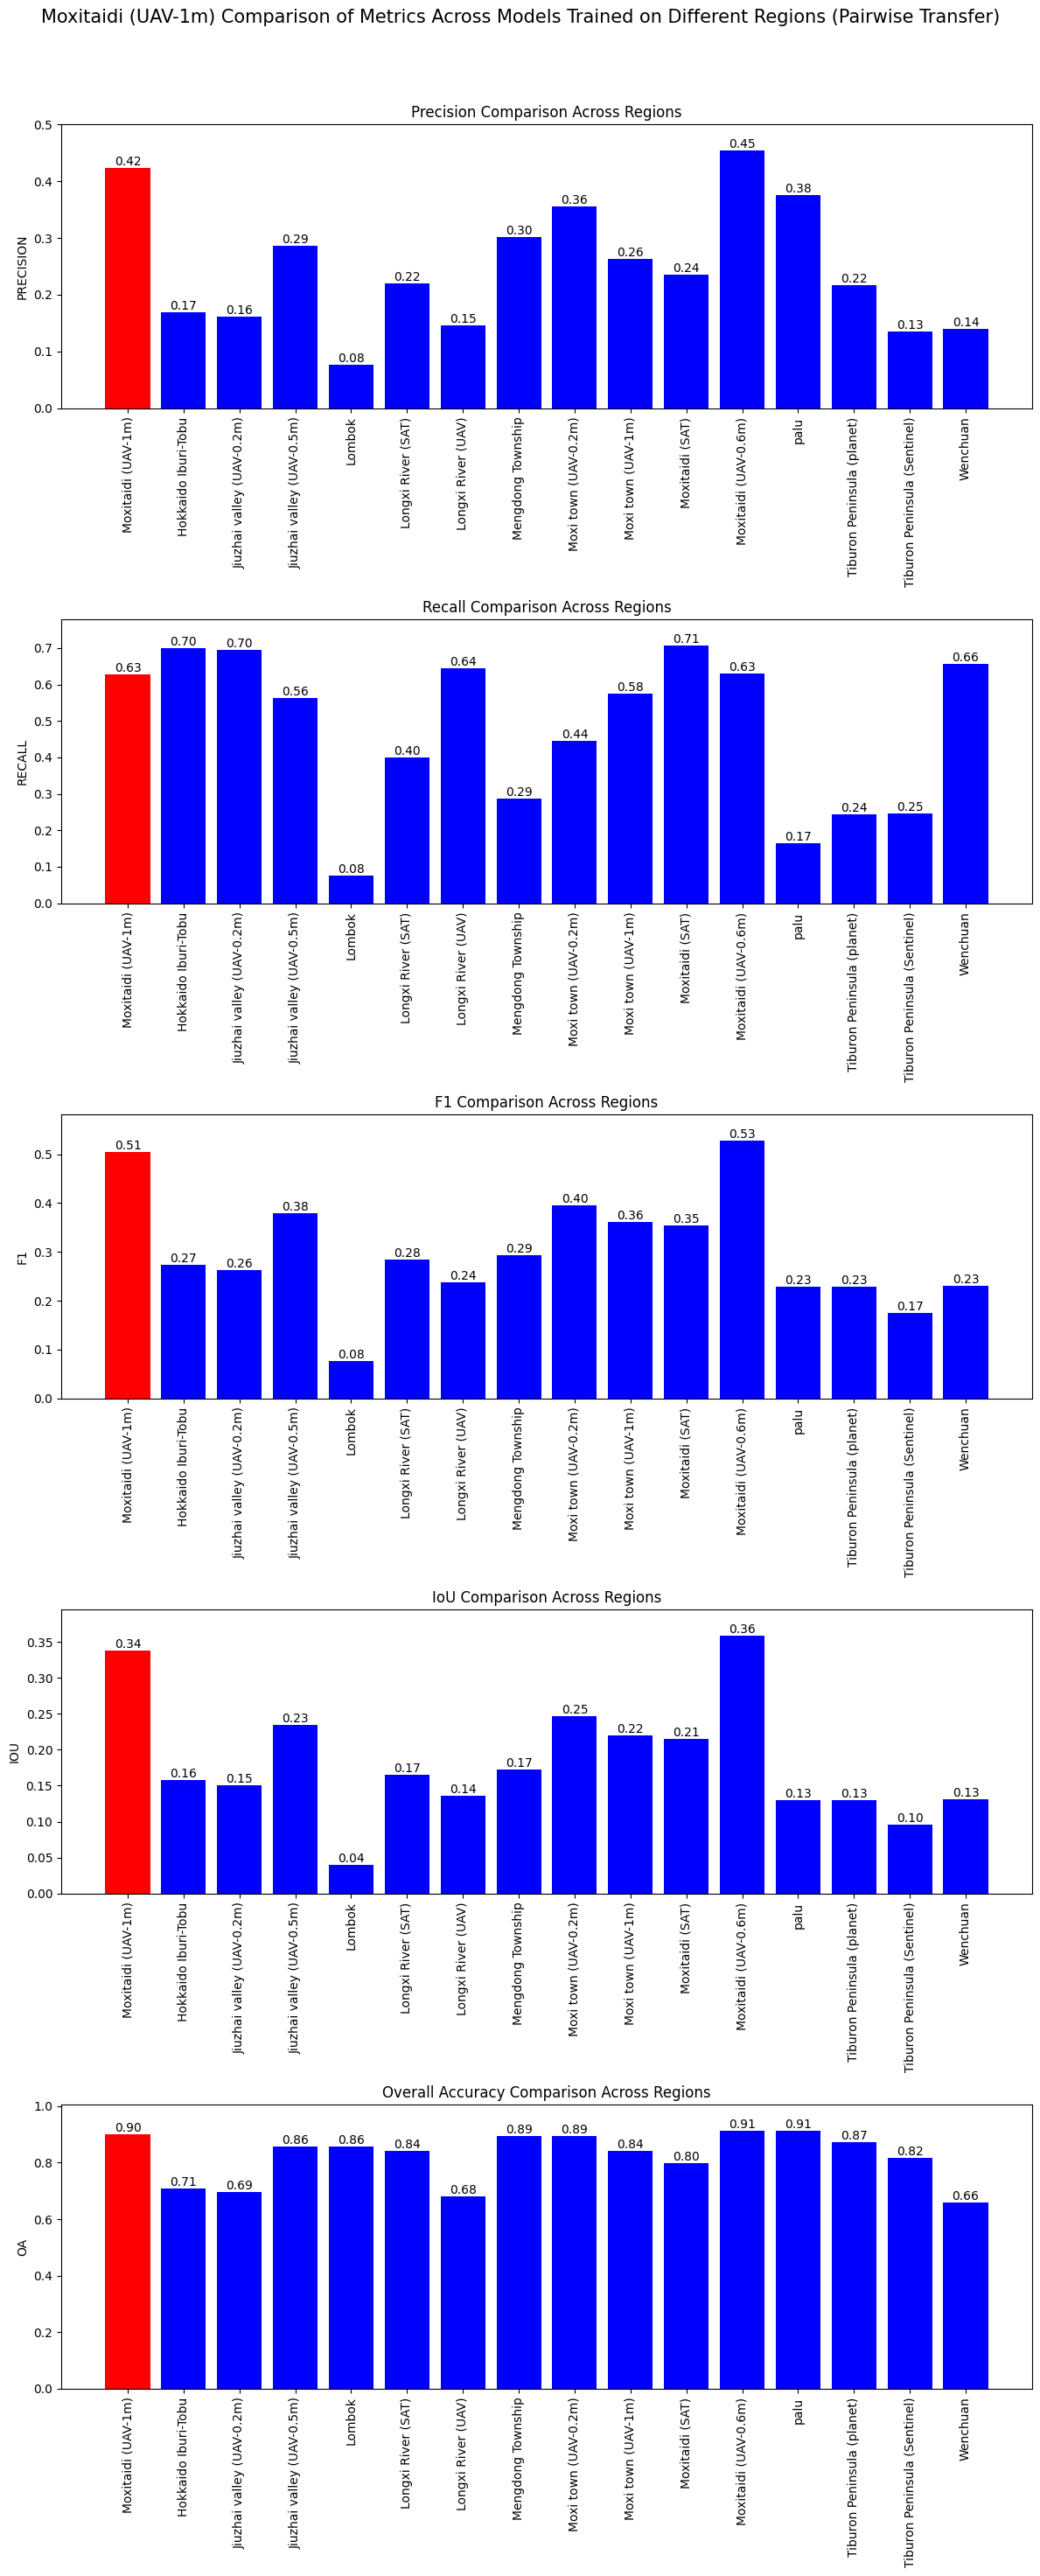

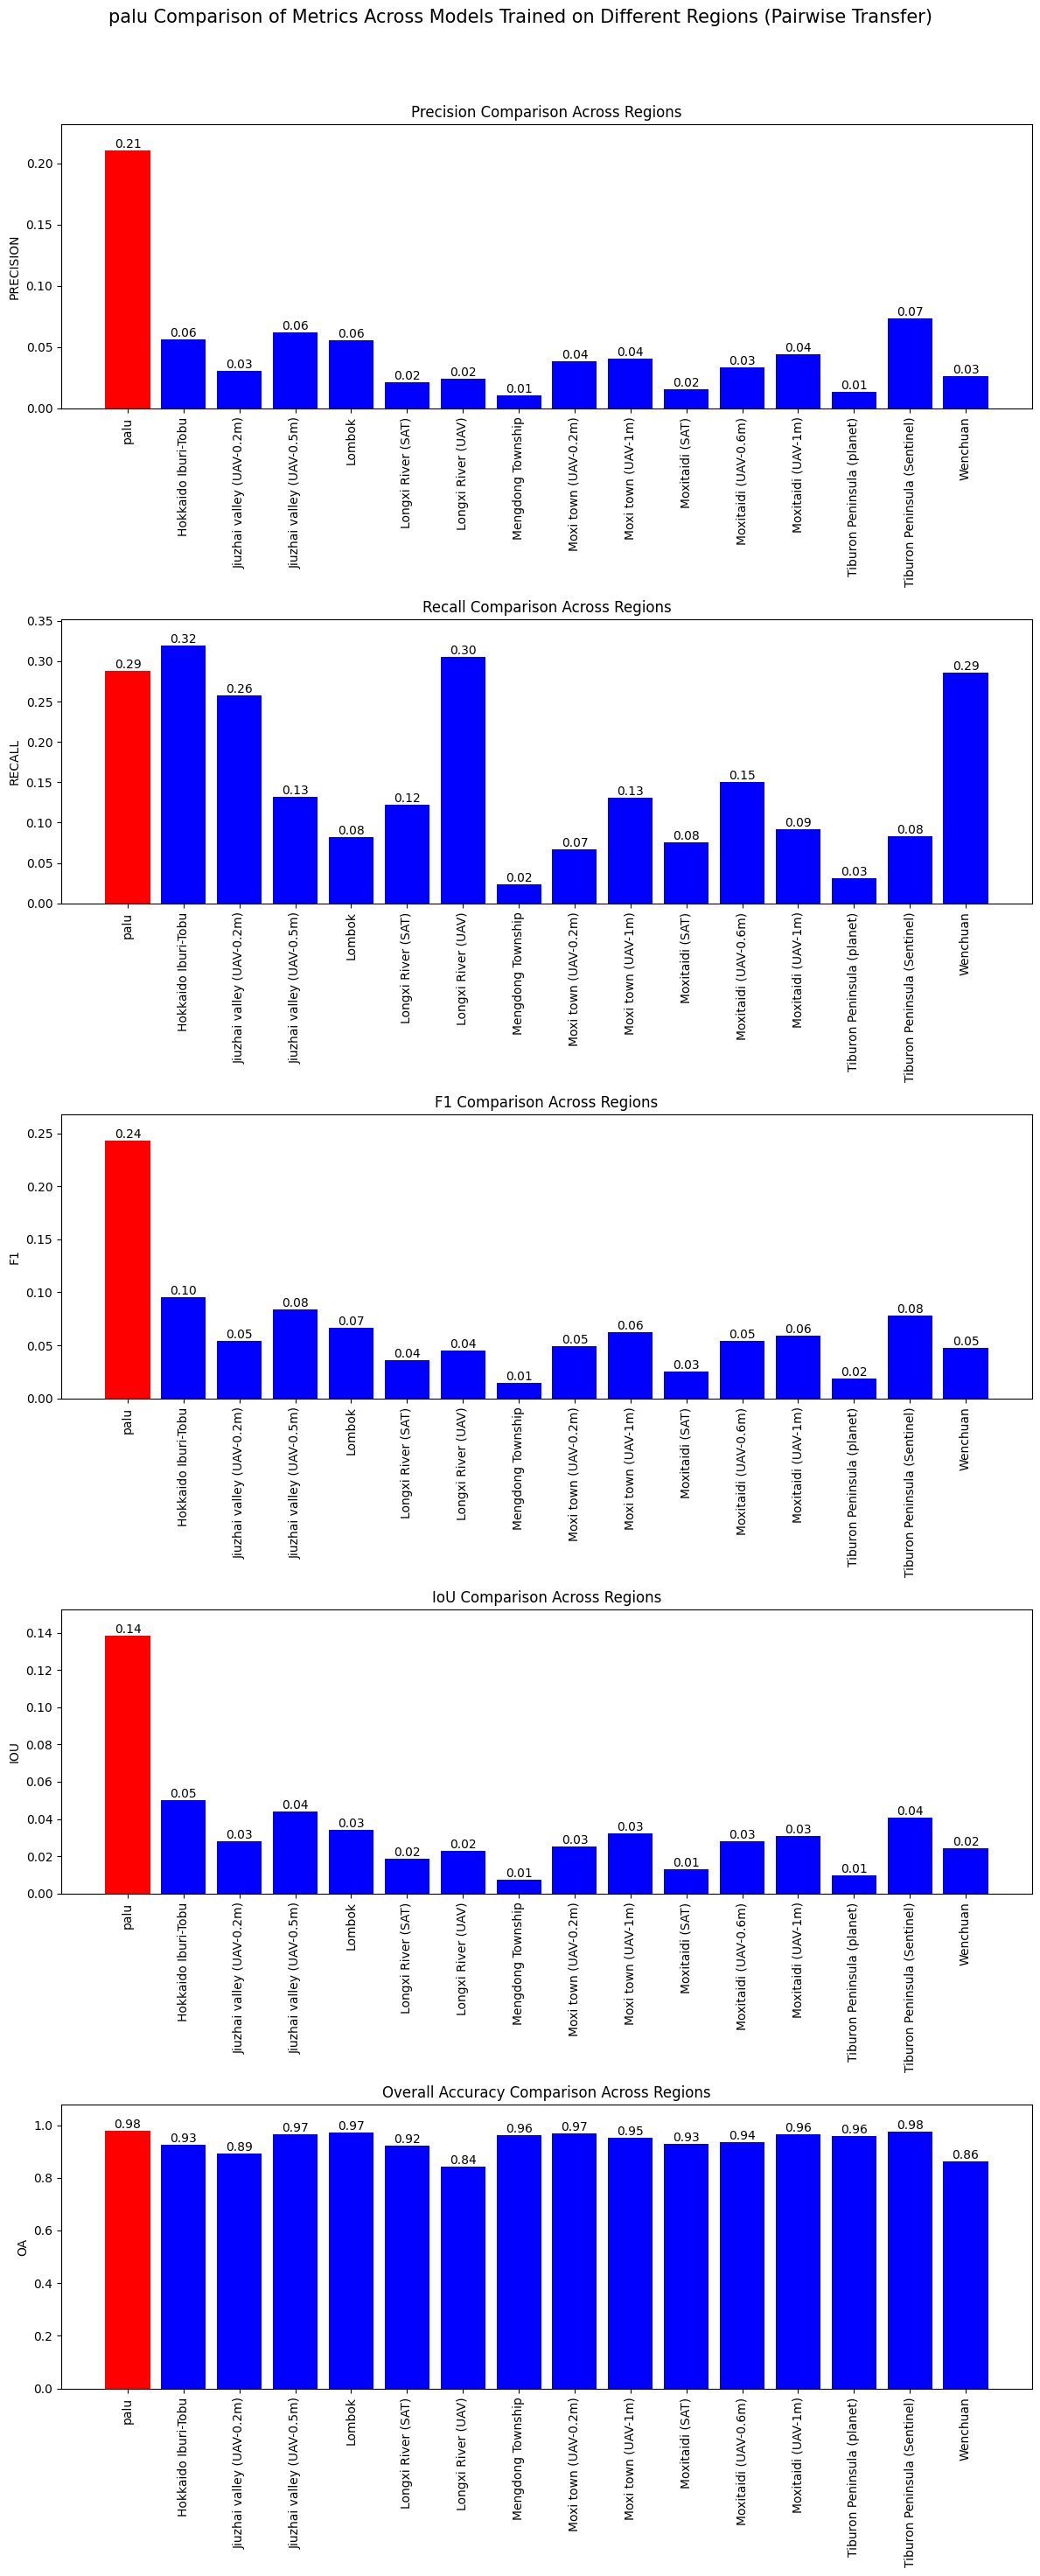

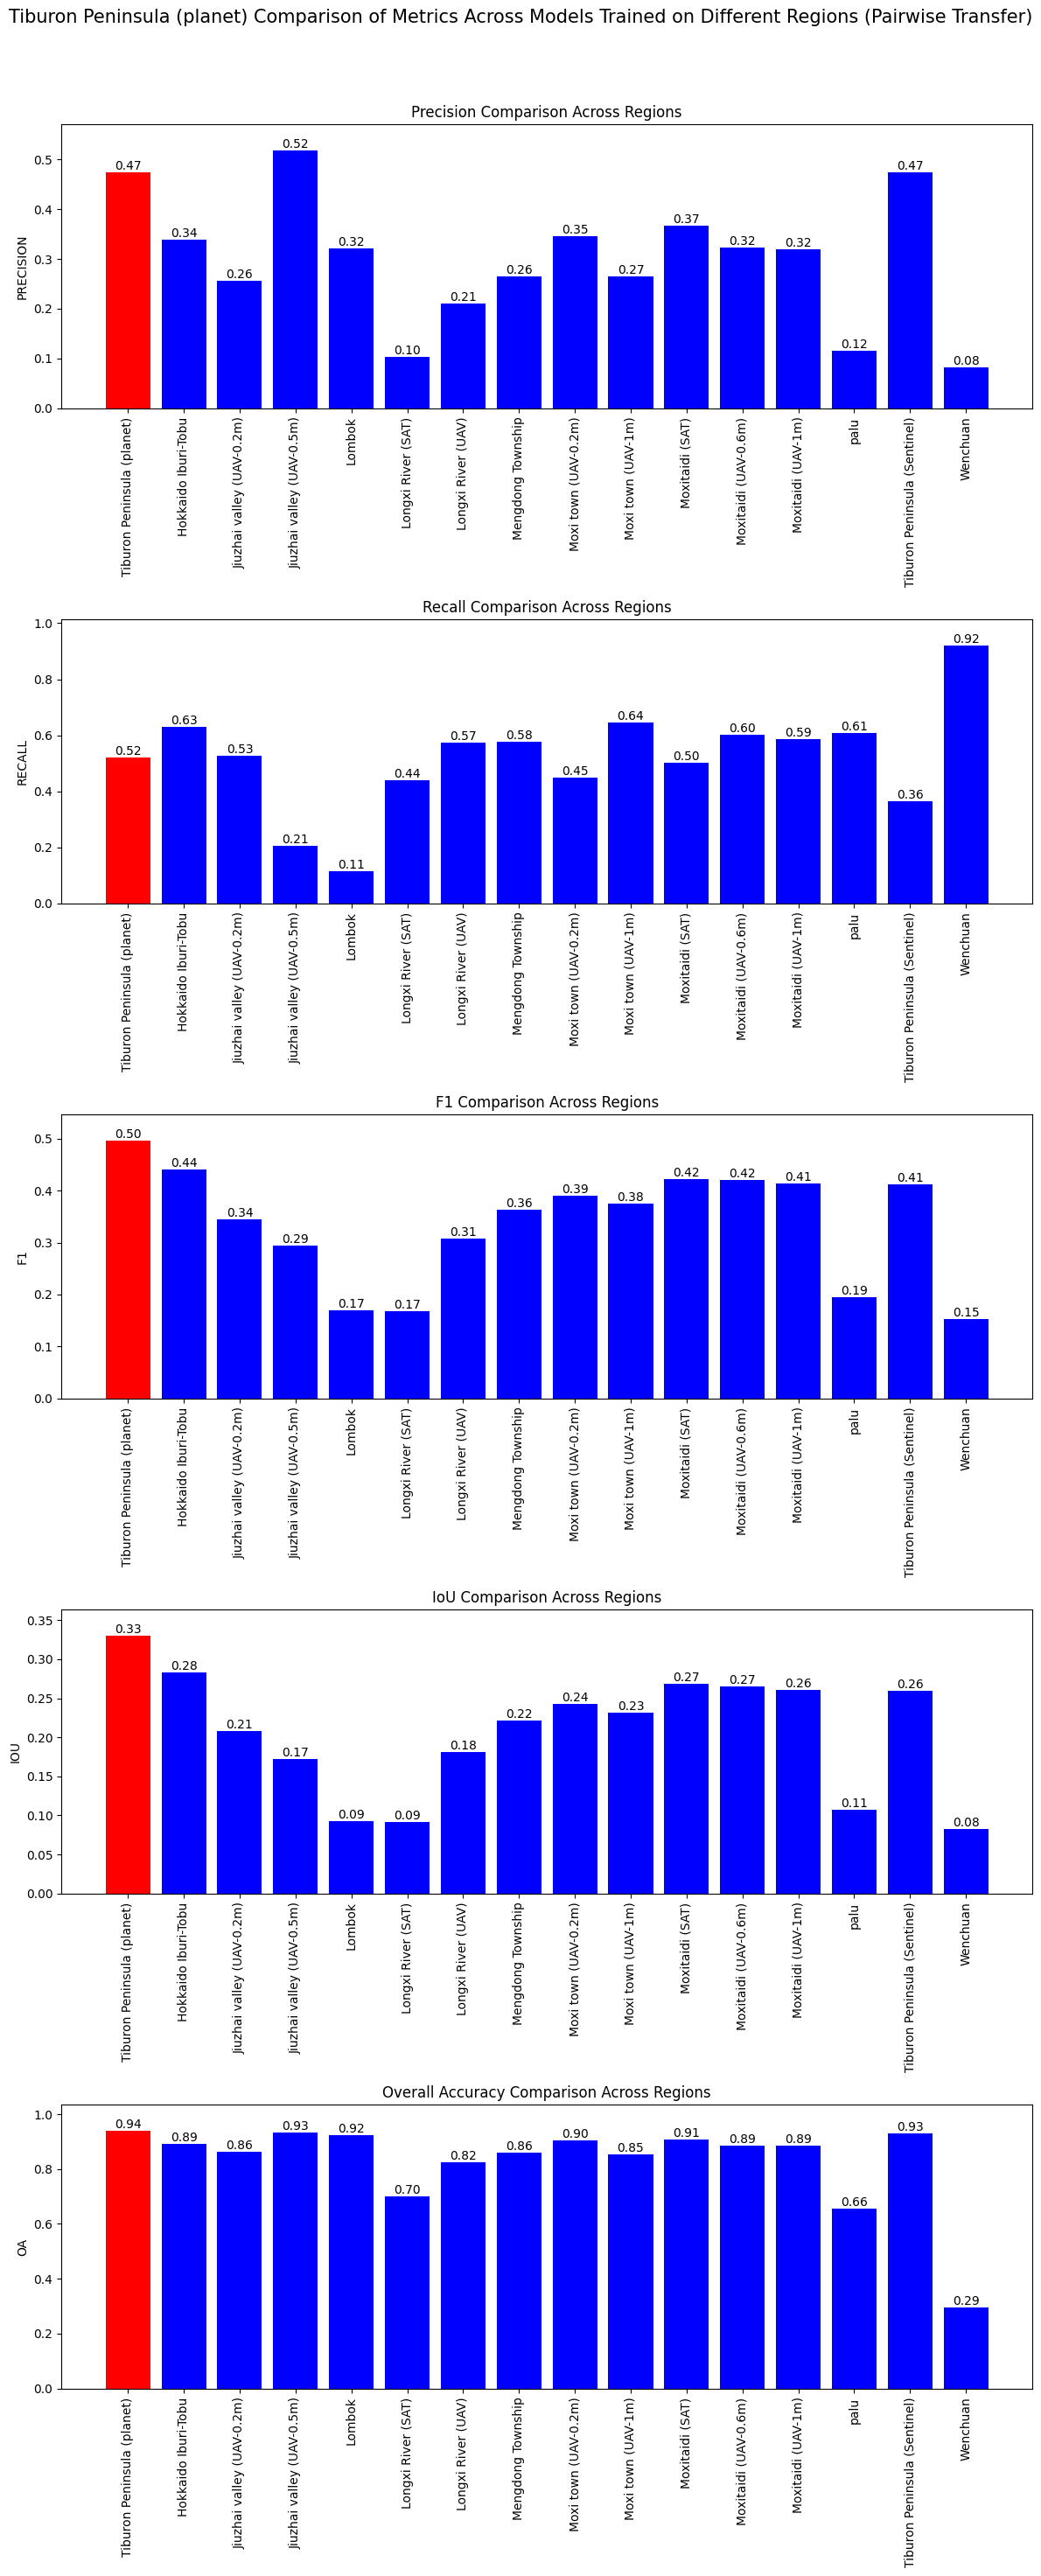

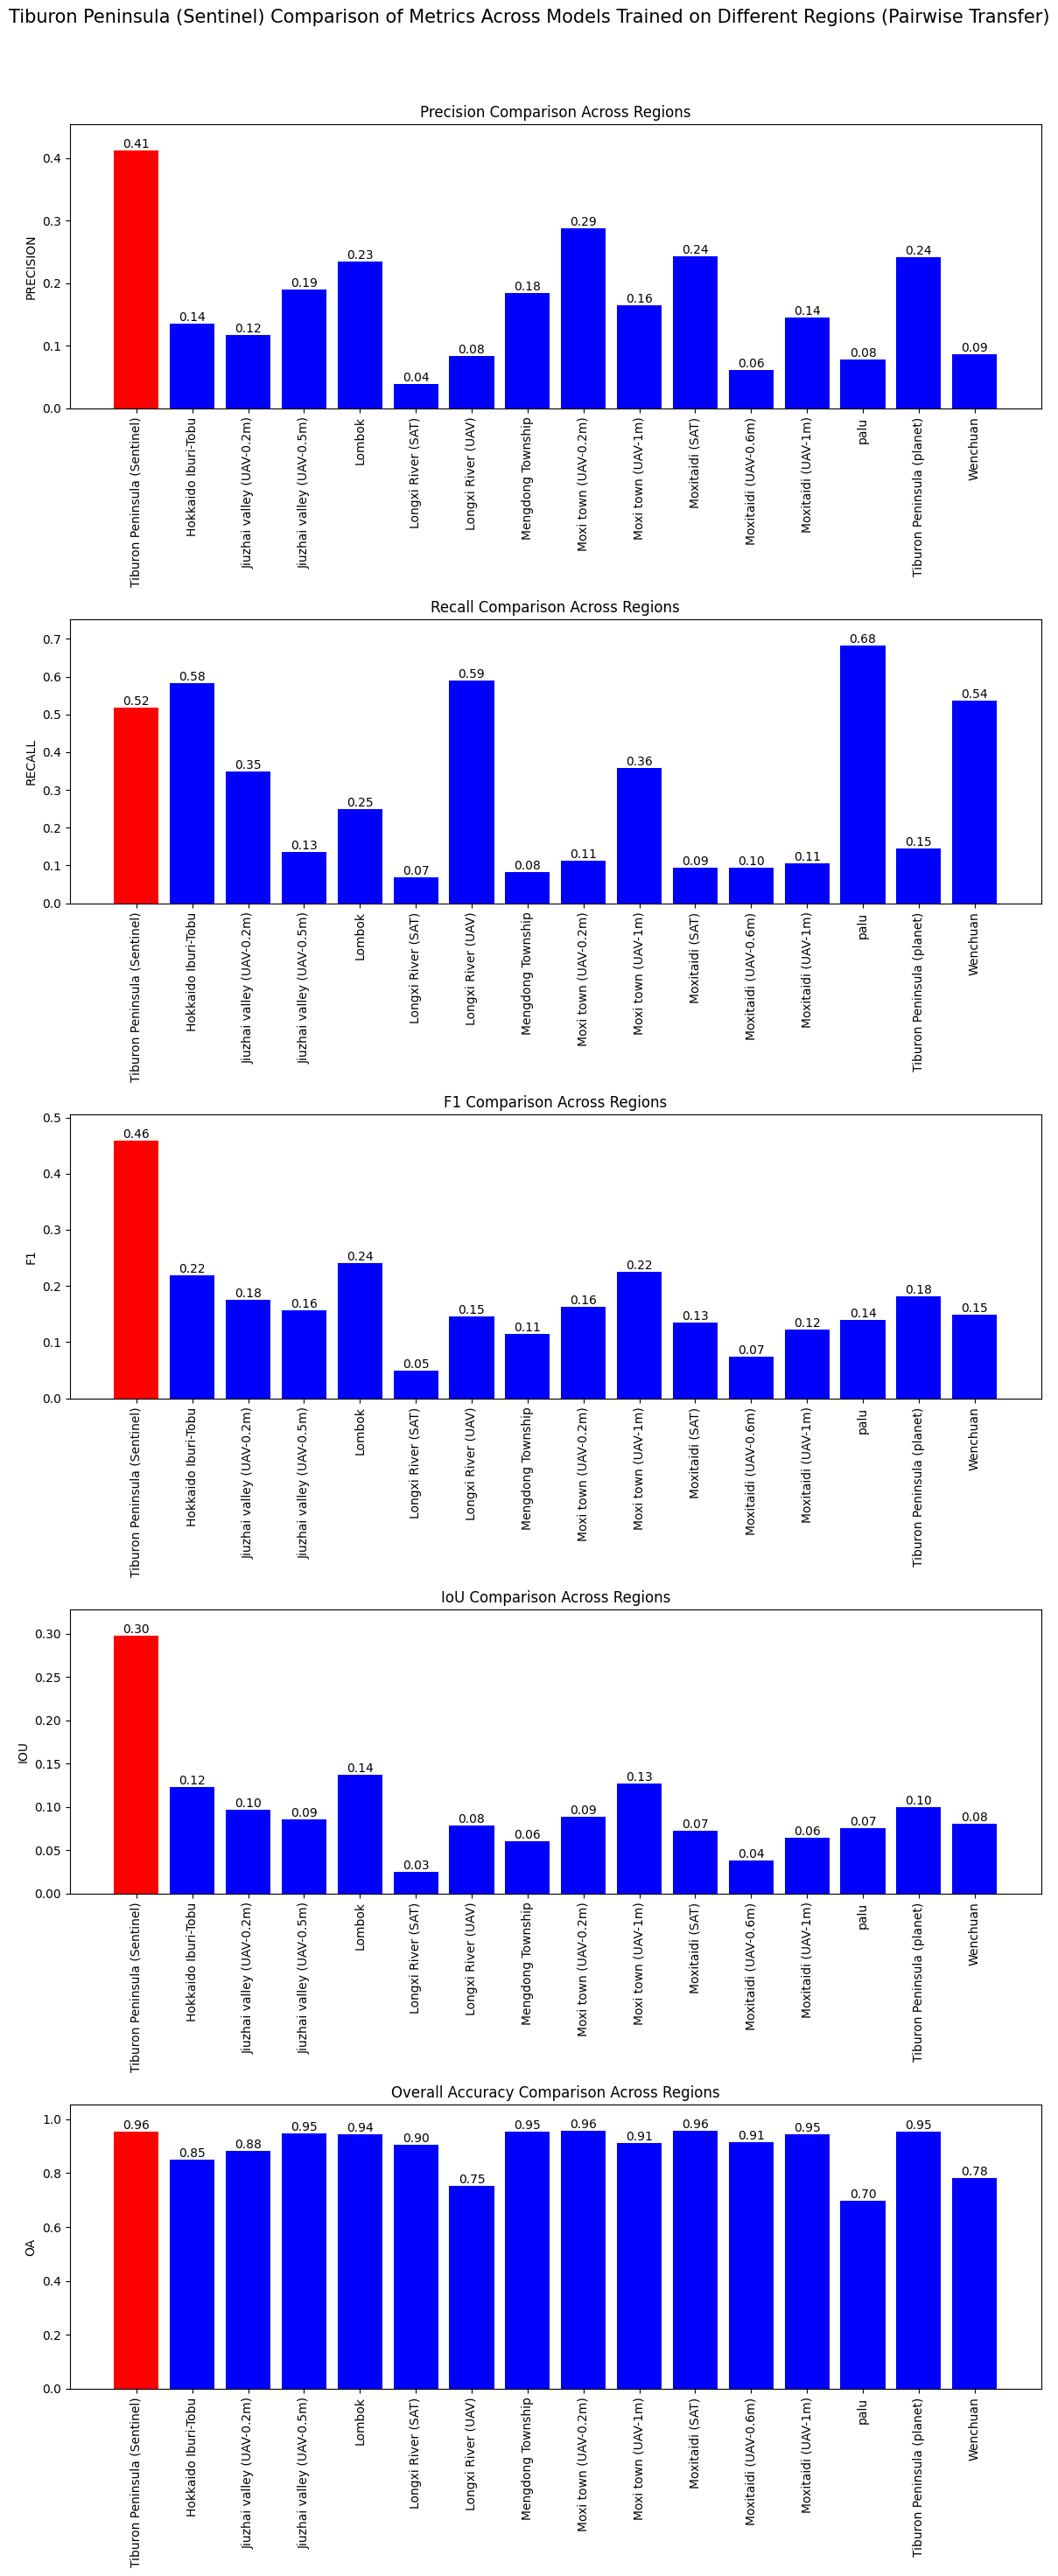

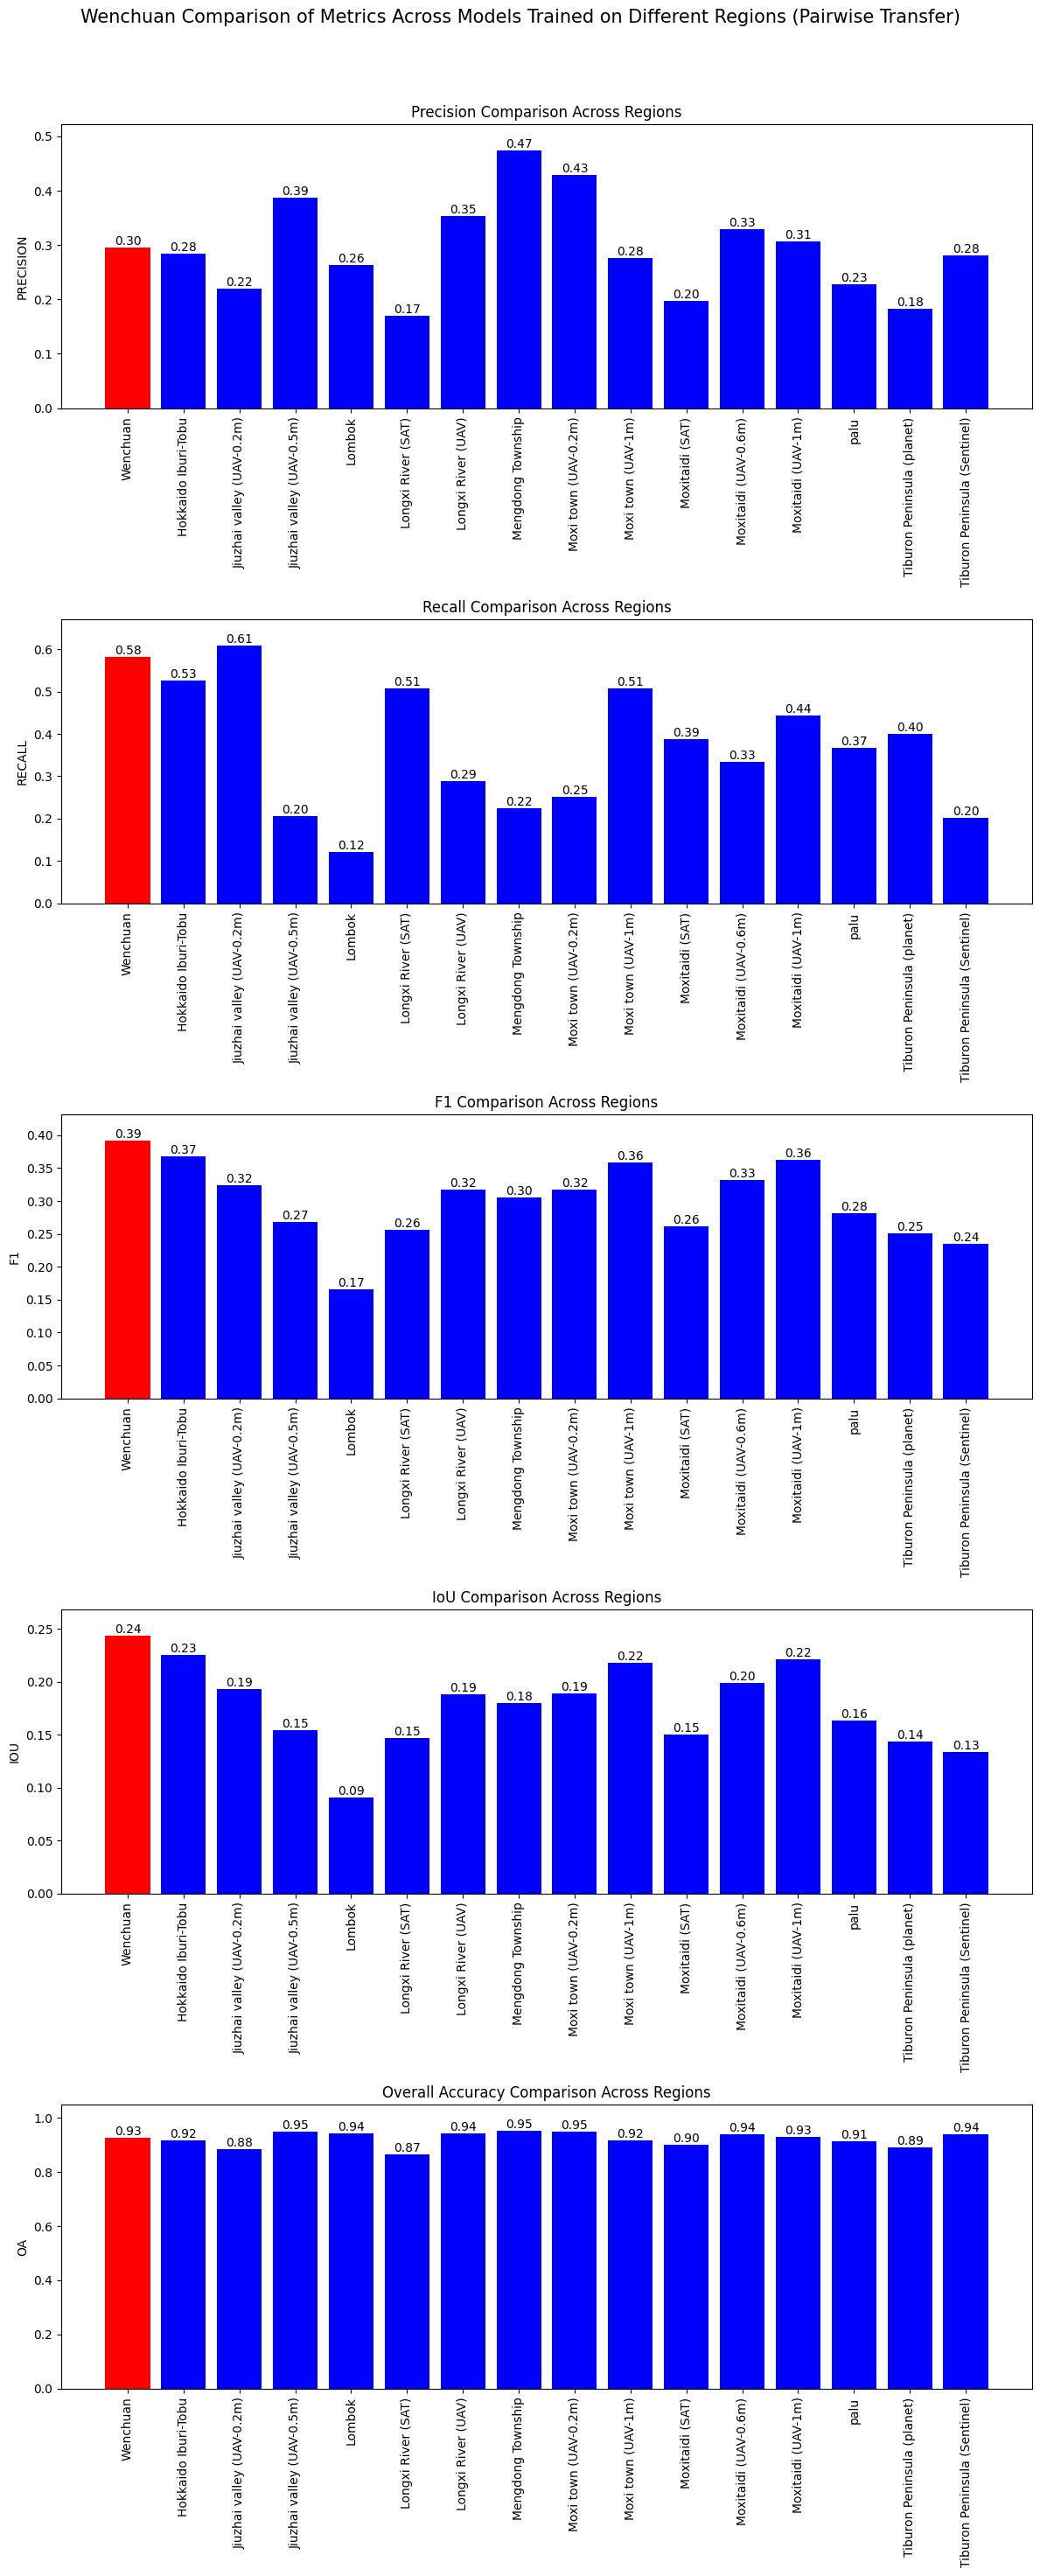

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os

data_dir = "../results/pairwise-transfer/"

csv_files = os.listdir(data_dir)

for file in csv_files:
    df_transfer = pd.read_csv(data_dir + file)
    df_original = pd.read_csv("../results/intra-region/" + file)

    best_row_original = df_original.loc[df_original['iou'].idxmax()]
    best_row_original = best_row_original.to_frame().T

    region = file.split(".csv")[0]

    best_row_original["region"] = region
    best_row_original["highlight"] = True

    df_transfer["highlight"] = False

    combined_df = pd.concat([best_row_original, df_transfer], ignore_index=True)

    properties = ["precision","recall","f1","iou","oa"]
    names = ["Precision", "Recall", "F1", "IoU", "Overall Accuracy"]

    fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(12,30))
    axes = axes.flatten()

    for i, prop in enumerate(properties):
        ax = axes[i]
        bars = ax.bar(
            combined_df["region"],
            combined_df[prop],
            color=["red" if highlight else "blue" for highlight in combined_df["highlight"]]
        )
        ax.set_title(f'{names[properties.index(prop)]} Comparison Across Regions')
        ax.set_ylabel(prop.upper())
        ax.set_xticks(range(len(combined_df["region"])))
        ax.set_xticklabels(combined_df["region"], rotation=90)
        ax.set_ylim(0, combined_df[prop].max() * 1.1)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", ha="center", va="bottom")
        
    fig.suptitle(f'{region} Comparison of Metrics Across Models Trained on Different Regions (Pairwise Transfer)', fontsize=15)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("../plots/pairwise-transfer/" + region + ".png", dpi=300, bbox_inches="tight")
    plt.show()
    